# 📊 DM2425_ABCDEats
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

### **Introduction**

In this notebook, we explore various clustering techniques to uncover patterns and segmentations in the data. Clustering is a critical step in unsupervised learning, enabling us to group data points based on their inherent similarities. By applying multiple algorithms, we can compare and validate cluster structures, ensuring robust and meaningful results.

We will implement and analyze the following clustering methods:

- **K-Means Clustering**: A popular partitioning algorithm that minimizes within-cluster variance to create well-defined groups.
- **Self-Organizing Map (SOM) with K-Means**: Combines the dimensionality reduction of SOMs with K-Means clustering to segment SOM weights.
- **Hierarchical Clustering**: A method that builds a hierarchy of clusters using a dendrogram, providing insight into nested relationships between data points.
- **Hierarchical Clustering + SOM**: Combines the hierarchical approach of dendrograms with Self-Organizing Maps for better cluster structure analysis.
- **Mean Shift Clustering**: A density-based algorithm that identifies clusters by locating regions of high data density.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Groups data points based on density, effectively handling outliers and capturing clusters of varying densities.
- **T-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization technique that projects high-dimensional data into 2D or 3D, aiding in visual inspection of clusters.

This notebook aims to evaluate the performance and insights provided by each method, helping us identify the most effective clustering approach for the dataset. By segmenting the data into meaningful clusters, we can derive actionable insights for customer segmentation and business strategies.

## Index <a id="top"></a>

1. [Group 1: Customer Demographics](#1.-group-1:-customer-demographics)  
   1.1 [K-Means](#1.1-k-means)  
   1.2 [SOM with K-Means](#1.2-som-with-k-means)  
   1.3 [Hierarchical Clustering](#1.3-hierarchical-clustering)  
   1.4 [Hierarchical Clustering + SOM](#1.4-hierarchical-clustering-+-som)  
   1.5 [Mean Shift](#1.5-mean-shift)  
   1.6 [DBSCAN](#1.6-dbscan)  
   1.7 [T-SNE](#1.7-t-sne)  

2. [Group 2: Spending Behavior](#2.-group-2:-spending-behavior)  
   2.1 [K-Means](#2.1-k-means)  
   2.2 [SOM with K-Means](#2.2-som-with-k-means)  
   2.3 [Hierarchical Clustering](#2.3-hierarchical-clustering)  
   2.4 [Hierarchical Clustering + SOM](#2.4-hierarchical-clustering-+-som)  
   2.5 [Mean Shift](#2.5-mean-shift)  
   2.6 [DBSCAN](#2.6-dbscan)  
   2.7 [T-SNE](#2.7-t-sne)  

3. [Group 3: Order Timing & Promotions](#3.-group-3:-order-timing-promotions)  
   3.1 [K-Means](#3.1-k-means)  
   3.2 [SOM with K-Means](#3.2-som-with-k-means)  
   3.3 [Hierarchical Clustering](#3.3-hierarchical-clustering)  
   3.4 [Hierarchical Clustering + SOM](#3.4-hierarchical-clustering-+-som)  
   3.5 [Mean Shift](#3.5-mean-shift)  
   3.6 [DBSCAN](#3.6-dbscan)  
   3.7 [T-SNE](#3.7-t-sne)  

4. [Group 4: Cuisine Preferences & Diversity](#4.-group-4:-cuisine-preferences-&-diversity)  
   4.1 [K-Means](#4.1-k-means)  
   4.2 [SOM with K-Means](#4.2-som-with-k-means)  
   4.3 [Hierarchical Clustering](#4.3-hierarchical-clustering)  
   4.4 [Hierarchical Clustering + SOM](#4.4-hierarchical-clustering-+-som)  
   4.5 [Mean Shift](#4.5-mean-shift)  
   4.6 [DBSCAN](#4.6-dbscan)  
   4.7 [T-SNE](#4.7-t-sne)  

5. 

6. [Clustering Conclusion: Final Method Selection and Integration](#5.-clustering-conclusion:-final-method-selection-and-integration)

# **Imports**

In [3]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [4]:
import pandas as pd
import numpy as np 
from minisom import MiniSom
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score

# **Read the Dataset**

In [5]:
data_normal = pd.read_excel("Numeric_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")
data = pd.read_excel("Numeric_Scaled_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [6]:
data_normal

customer_age  vendor_count  product_count  is_chain  first_order  \
0              18.0           2.0            5.0       1.0            0   
1              17.0           2.0            2.0       2.0            0   
2              38.0           1.0            2.0       2.0            0   
3              22.8           2.0            3.0       1.0            0   
4              20.0           2.0            5.0       0.0            0   
...             ...           ...            ...       ...          ...   
31764          24.8           1.0            1.0       1.0           89   
31765          26.0           1.0            1.0       1.0           89   
31766          20.0           1.0            2.0       0.0           89   
31767          22.0           1.0            3.0       1.0           89   
31768          26.0           1.0            1.0       1.0           90   

       last_order  order_activity_duration  order_frequency  \
0               1                        1              5.0   
1               1                        1              2.0   
2               1                        1              2.0   
3               2                        2              1.5   
4               2                        2              2.5   
...           ...                      ...              ...   
31764          89                        0              1.0   
31765          89                        0              1.0   
31766          89                        0              2.0   
31767          89                        0              3.0   
31768          90                        0              1.0   

       cuisine_diversity  weekend_spending  ...  avg_spent_per_product  \
0                      1               2.0  ...               0.400000   
1                      2               2.0  ...               1.000000   
2                      1               2.0  ...               1.000000   
3                      2               1.0  ...               0.666667   
4                      2               1.0  ...               0.400000   
...                  ...               ...  ...                    ...   
31764                  1               0.0  ...               1.000000   
31765                  1               0.0  ...               1.000000   
31766                  1               0.0  ...               0.500000   
31767                  1               0.0  ...               0.333333   
31768                  1               0.0  ...               1.000000   

       supper_spending  breakfast_spending  lunch_spending  snack_spending  \
0                    0                   0               0               2   
1                    0                   1               1               0   
2                    0                   1               1               0   
3                    0                   0               2               0   
4                    0                   2               0               0   
...                ...                 ...             ...             ...   
31764                0                   0               0               0   
31765                0                   0               1               0   
31766                0                   0               1               0   
31767                0                   0               0               1   
31768                0                   0               0               0   

       dinner_spending  Total_Cuisine_Orders  Asian_Cuisines_Ratio  \
0                    0                 28.88              1.000000   
1                    0                 19.21              0.332639   
2                    0                  9.20              0.000000   
3                    0                 31.56              1.000000   
4                    0                 55.44              0.737193   
...                ...                   ...                   ...   
31764                1           

In [7]:
data

customer_age  product_count  is_chain  first_order  last_order  \
0          0.103448       0.357143  0.166667     0.000000    0.000000   
1          0.068966       0.142857  0.333333     0.000000    0.000000   
2          0.793103       0.142857  0.333333     0.000000    0.000000   
3          0.268966       0.214286  0.166667     0.000000    0.011236   
4          0.172414       0.357143  0.000000     0.000000    0.011236   
...             ...            ...       ...          ...         ...   
31764      0.337931       0.071429  0.166667     0.988889    0.988764   
31765      0.379310       0.071429  0.166667     0.988889    0.988764   
31766      0.172414       0.142857  0.000000     0.988889    0.988764   
31767      0.241379       0.214286  0.166667     0.988889    0.988764   
31768      0.379310       0.071429  0.166667     1.000000    1.000000   

       order_activity_duration  cuisine_diversity  weekend_spending  \
0                     0.011111           0.090909              0.50   
1                     0.011111           0.181818              0.50   
2                     0.011111           0.090909              0.50   
3                     0.022222           0.181818              0.25   
4                     0.022222           0.181818              0.25   
...                        ...                ...               ...   
31764                 0.000000           0.090909              0.00   
31765                 0.000000           0.090909              0.00   
31766                 0.000000           0.090909              0.00   
31767                 0.000000           0.090909              0.00   
31768                 0.000000           0.090909              0.00   

       week_spending  total_orders  Total_Cuisine_Orders  \
0                0.0      0.153846              0.153193   
1                0.0      0.153846              0.101899   
2                0.0      0.153846              0.048801   
3                0.1      0.153846              0.167409   
4                0.1      0.153846              0.294080   
...              ...           ...                   ...   
31764            0.1      0.076923              0.009283   
31765            0.1      0.076923              0.009866   
31766            0.1      0.076923              0.122799   
31767            0.1      0.076923              0.116752   
31768            0.1      0.076923              0.013845   

       Asian_Cuisines_Ratio  Western_Cuisines_Ratio  Others_Cuisines_Ratio  
0                  1.000000                0.000000                    0.0  
1                  0.332639                0.667361                    0.0  
2                  0.000000                1.000000                    0.0  
3                  1.000000                0.000000                    0.0  
4                  0.737193                0.262807                    0.0  
...                     ...                     ...                    ...  
31764              0.000000                0.000000                    1.0  
31765              0.000000                1.000000                    0.0  
31766              0.000000                0.000000                    1.0  
31767              0.000000                0.000000                    1.0  
31768              0.000000                1.000000                    0.0  

[31769 rows x 14 columns]

# *CLUSTERING*

[⬆️ Back to Top](#index)

# Group the Data

In [8]:
# Revised 5 Groups with Adjusted Order
group_1 = data[['customer_age', 'is_chain']]
group_2 = data[['weekend_spending', 'week_spending', 'Total_Cuisine_Orders']]
group_3 = data[['first_order', 'last_order']]
group_4 = data[['cuisine_diversity', 'Others_Cuisines_Ratio', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']]
group_5 = data[['total_orders', 'product_count', 'order_activity_duration']]

# Summary Dictionary for Groups
groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing": group_3,
    "Group 4: Cuisine Preferences and Diversity": group_4,
    "Group 5: Order Volume and Product Count": group_5
}

# Display Groups Summary
groups_summary


{'Group 1: Customer Demographics':        customer_age  is_chain
 0          0.103448  0.166667
 1          0.068966  0.333333
 2          0.793103  0.333333
 3          0.268966  0.166667
 4          0.172414  0.000000
 ...             ...       ...
 31764      0.337931  0.166667
 31765      0.379310  0.166667
 31766      0.172414  0.000000
 31767      0.241379  0.166667
 31768      0.379310  0.166667
 
 [31769 rows x 2 columns],
 'Group 2: Spending Behavior':        weekend_spending  week_spending  Total_Cuisine_Orders
 0                  0.50            0.0              0.153193
 1                  0.50            0.0              0.101899
 2                  0.50            0.0              0.048801
 3                  0.25            0.1              0.167409
 4                  0.25            0.1              0.294080
 ...                 ...            ...                   ...
 31764              0.00            0.1              0.009283
 31765              0.00            0.1

### **Group 1: Customer Demographics**
This group focuses on attributes that help profile customers:
- **`customer_age`**: Age of the customer.
- **`is_chain`**: Whether the customer prefers chain restaurants.

---

### **Group 2: Spending Behavior**
This group captures customer spending habits and patterns:
- **`weekend_spending`**: Spending during weekends.
- **`week_spending`**: Spending during weekdays.
- **`Total_Cuisine_Orders`**: Total amount spent across all cuisines.

---

### **Group 3: Order Timing**
This group analyzes the timing of customer orders:
- **`first_order`**: Date of the first order.
- **`last_order`**: Date of the most recent order.

---

### **Group 4: Cuisine Preferences & Diversity**
This group focuses on customer preferences and diversity in cuisine choices:
- **`cuisine_diversity`**: Number of unique cuisines ordered by the customer.
- **`Asian_Cuisines_Ratio`**: Proportion of Asian cuisine orders relative to total orders.
- **`Western_Cuisines_Ratio`**: Proportion of Western cuisine orders relative to total orders.
- **`Others_Cuisines_Ratio`**: Proportion of other cuisine orders relative to total orders.

---

### **Group 5: Order Volume and Product Count**
This group evaluates the volume and frequency of customer orders:
- **`total_orders`**: Total number of orders placed by the customer.
- **`product_count`**: Total number of products ordered.
- **`order_activity_duration`**: Duration between the first and last order.

# **1. Group 1: Customer Demographics**

## 1.1 K-Means

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

[⬆️ Back to Top](#top)

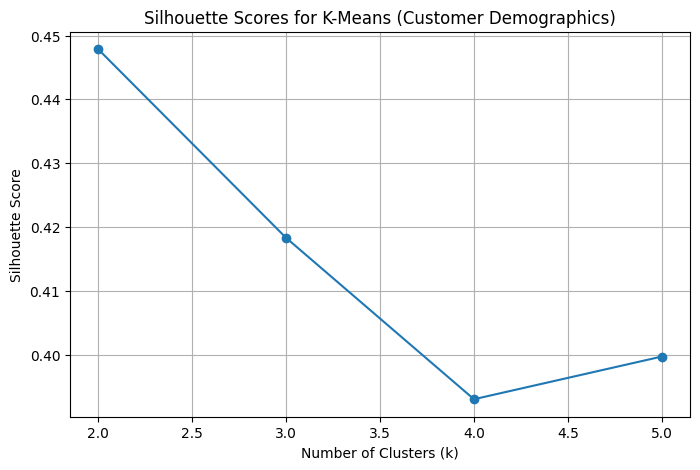

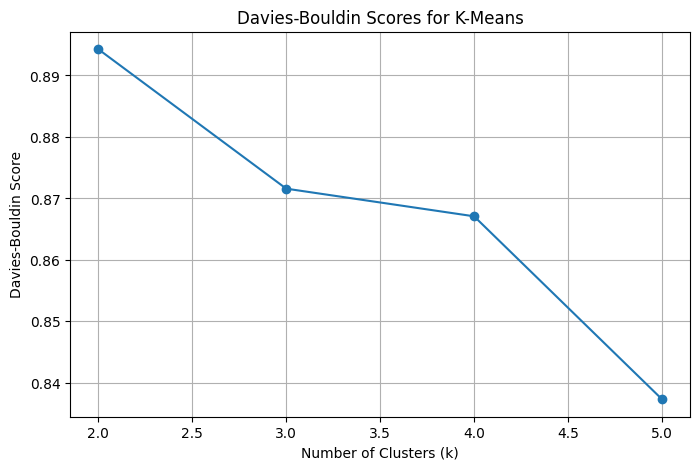

Optimal k (Silhouette Score): 2, Silhouette Score: 0.4478562097931082
Optimal k (Davies-Bouldin Index): 5, Davies-Bouldin Score: 0.8373391409252522
Final chosen k: 2
Consistent Silhouette Score for k=2: 0.4478562097931082


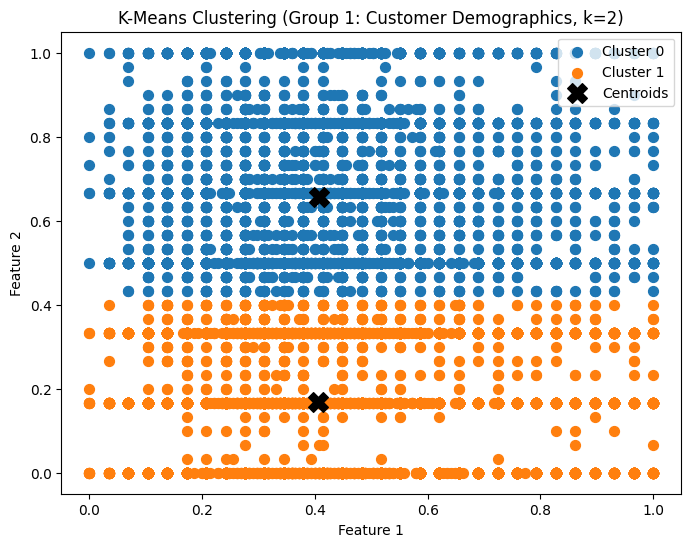

In [9]:
# Initialize a DataFrame to store clustering results
cluster_results = group_1.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_1)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_1, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_1, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_1, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results['kmeans_cluster'] = final_kmeans.fit_predict(group_1)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results['kmeans_cluster']):
    cluster_points = group_1[cluster_results['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 1: Customer Demographics, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## 1.2 SOM with K-Means

[⬆️ Back to Top](#top)

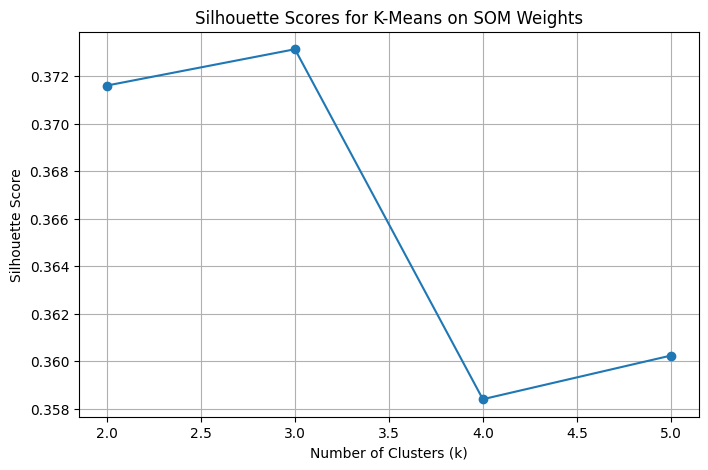

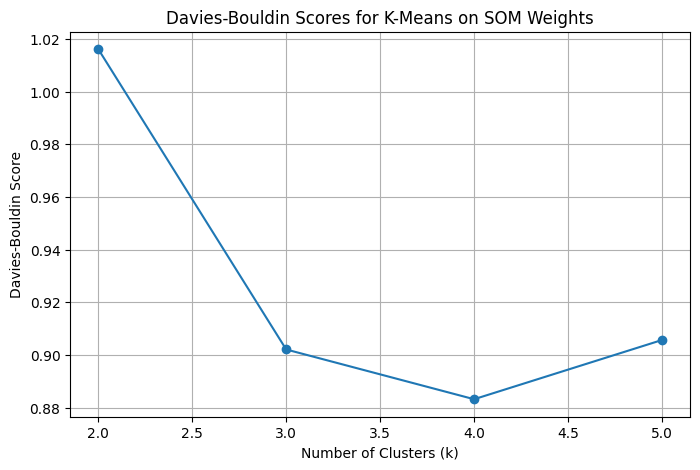

Optimal k (Silhouette Score): 3, Silhouette Score: 0.3731
Optimal k (Davies-Bouldin Index): 4, Davies-Bouldin Score: 0.8832
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.3731


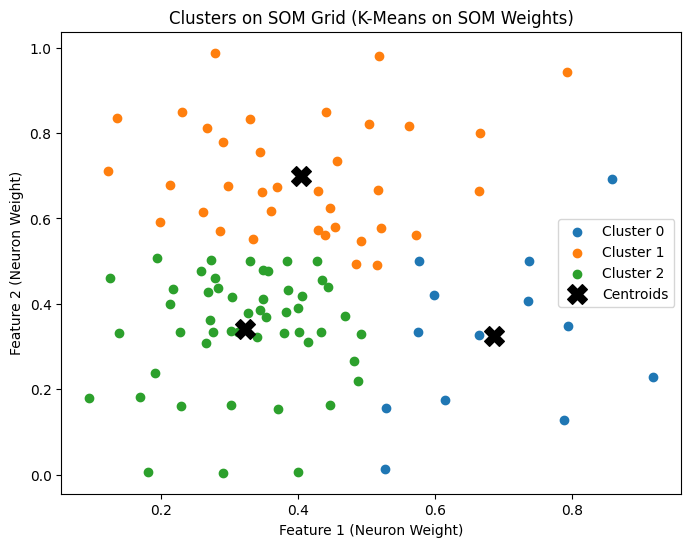

Cluster Summary:
                    customer_age  is_chain
som_kmeans_cluster                        
0                       0.679357  0.221652
1                       0.392391  0.748529
2                       0.305880  0.227547


In [10]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(data=group_1.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_1.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results
cluster_results['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_1.groupby(cluster_results['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)

## 1.3 Hierarchical (Agglomerative Clustering)

Optimal k (Silhouette Score): 2, Silhouette Score: 0.3860
Optimal k (Davies-Bouldin Score): 5, Davies-Bouldin Score: 0.8969
Hierarchical Clustering Silhouette Score (Group 1): 0.3860
Hierarchical Clustering Davies-Bouldin Score (Group 1): 0.9353


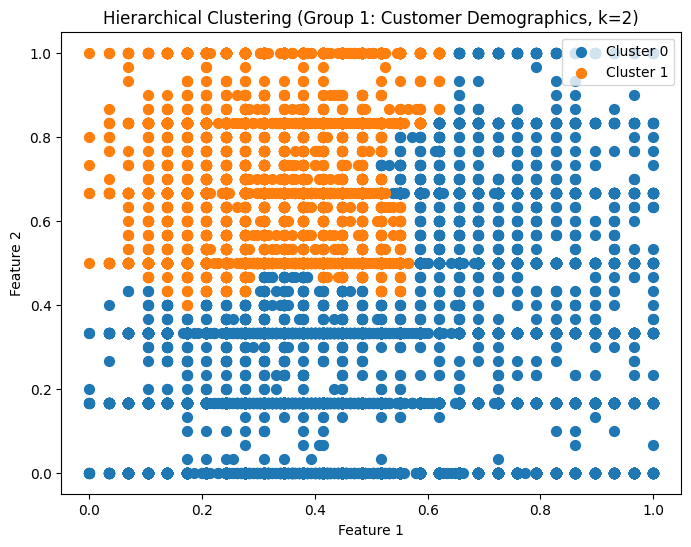

In [11]:
# ======= Normal Hierarchical Clustering =======
from sklearn.cluster import AgglomerativeClustering

# Initialize storage for evaluation metrics
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

# Iterate through possible cluster counts
for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_1)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_1, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_1, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on evaluation metrics
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

# Perform hierarchical clustering with the optimal number of clusters
if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_1)

    # Add Hierarchical Clustering labels to cluster_results
    cluster_results['hierarchical_cluster'] = hierarchical_labels

    # Validate clustering using evaluation metrics
    silhouette_score_hierarchical = silhouette_score(group_1, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_1, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 1): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 1): {davies_bouldin_score_hierarchical:.4f}")

    # Plot the Hierarchical clusters
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_1[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 1: Customer Demographics, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


## 1.4 Hierarchical clustering combined with SOM and K-means

[⬆️ Back to Top](#top)

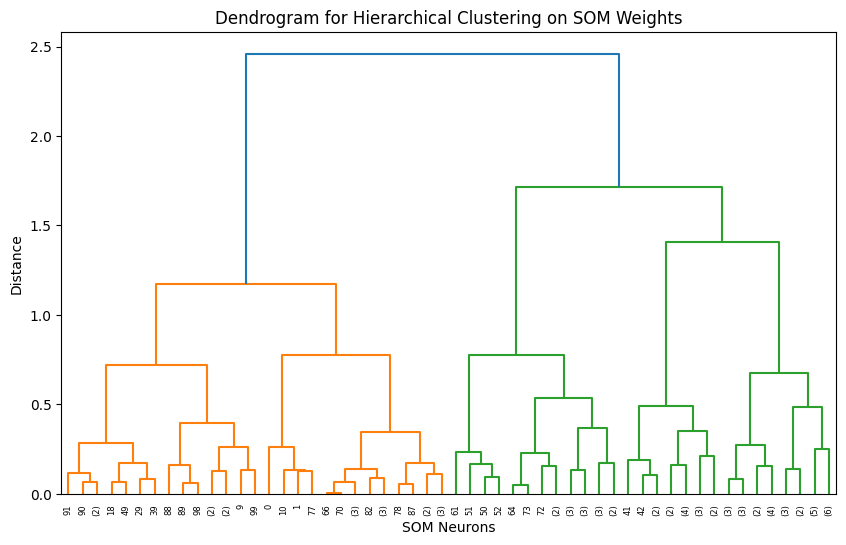

Optimal k based on Silhouette Score: 5
Silhouette Score for optimal_k: 0.3015
Optimal k based on Davies-Bouldin Score: 5
Davies-Bouldin Score for optimal_k: 0.9228
Hierarchical Clustering Silhouette Score: 0.3015
Hierarchical Clustering Davies-Bouldin Score: 0.9228


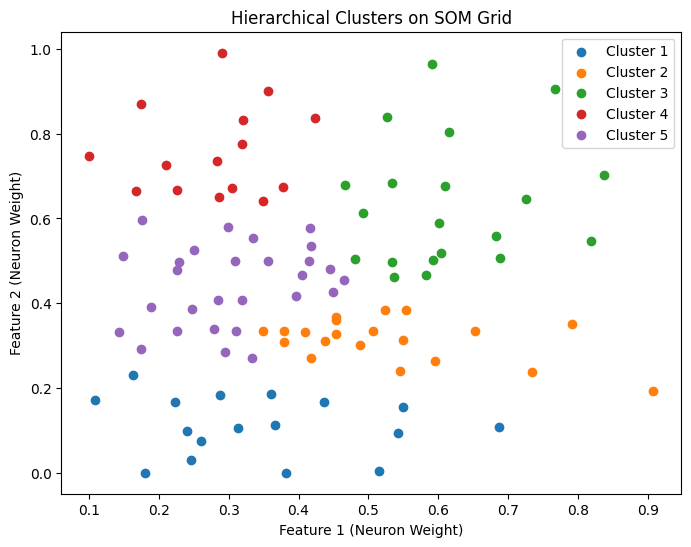

Cluster Summary (SOM + Hierarchical Clustering):
                          customer_age  is_chain
som_hierarchical_cluster                        
1                             0.377221  0.096281
2                             0.588758  0.294553
3                             0.627728  0.658427
4                             0.289998  0.779815
5                             0.267395  0.428419


In [12]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(group_1.values, 1000)
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])
linkage_matrix = linkage(som_weights, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score after cutting dendrogram
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate silhouette score if there is more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, can refine logic

    print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")
    print(f"Silhouette Score for optimal_k: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k based on Davies-Bouldin Score: {optimal_k_davies_bouldin}")
    print(f"Davies-Bouldin Score for optimal_k: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Calculate silhouette and Davies-Bouldin scores for final clustering
    if len(np.unique(hierarchical_labels)) > 1:
        hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
        hierarchical_davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")
        print(f"Hierarchical Clustering Davies-Bouldin Score: {hierarchical_davies_bouldin:.4f}")
    else:
        print("Hierarchical clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

    data_hierarchical_clusters = []
    for row in group_1.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add SOM-based Hierarchical results to cluster_results
    cluster_results['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot the final clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for i in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == i, 0],
            som_weights[hierarchical_labels == i, 1],
            label=f'Cluster {i}'
        )
    plt.title("Hierarchical Clusters on SOM Grid")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    hierarchical_summary = group_1.groupby(cluster_results['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(hierarchical_summary)

## 1.5 MeanShift

[⬆️ Back to Top](#top)

Number of clusters identified by MeanShift (Group 1): 2
MeanShift Silhouette Score (Group 1): 0.3821
MeanShift Davies-Bouldin Score (Group 1): 1.0018


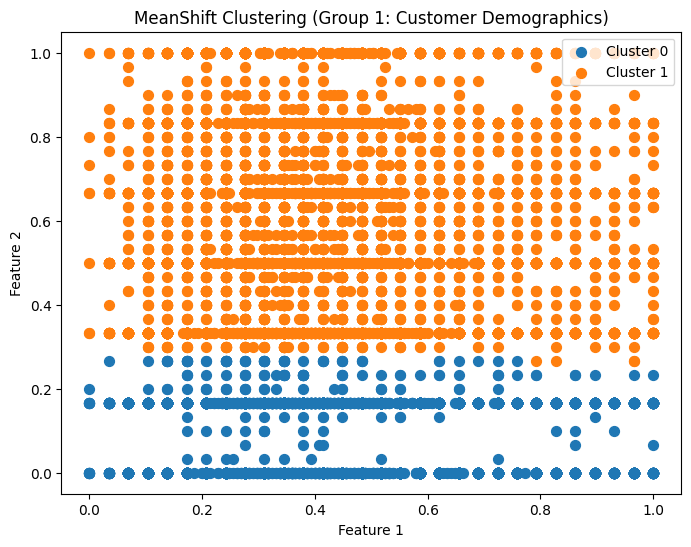

Cluster Summary (MeanShift):
   customer_age  is_chain
0      0.406165  0.098609
1      0.405853  0.537666


In [13]:
bandwidth = estimate_bandwidth(group_1, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_1)
cluster_results['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 1): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_1, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_1, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 1): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 1): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_1[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_1.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")

## 1.6 DBSCAN

[⬆️ Back to Top](#top)

Number of clusters identified by DBSCAN (Group 1): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


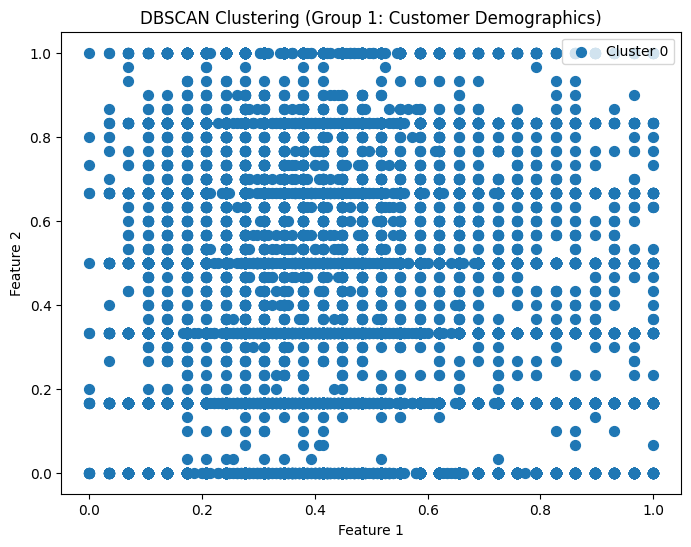

No meaningful clustering identified.


In [14]:
# ======= DBSCAN Clustering =======

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_1)
cluster_results['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 1): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_1[group_1['dbscan_cluster'] != -1],
        group_1[group_1['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_1[group_1['dbscan_cluster'] != -1],
        group_1[group_1['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    print(f"DBSCAN Silhouette Score (Group 1): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 1): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_1[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_1[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_1[group_1['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")

## 1.7 Reverse scaling to analyze clusters

[⬆️ Back to Top](#top)

In [15]:
def reverse_scaling(scaled_data, original_data, columns_to_reverse, column_to_keep):
    for col in columns_to_reverse:
        if col not in scaled_data.columns:
            raise ValueError(f"A coluna '{col}' não está presente no DataFrame escalado.")

    if column_to_keep not in scaled_data.columns:
        raise ValueError(f"A coluna '{column_to_keep}' não está presente no DataFrame escalado.")

    scaler = MinMaxScaler()
    scaler.fit(original_data[columns_to_reverse])
    reversed_columns = scaler.inverse_transform(scaled_data[columns_to_reverse])
    reversed_columns_df = pd.DataFrame(reversed_columns, columns=columns_to_reverse, index=scaled_data.index)
    reversed_columns_df[column_to_keep] = scaled_data[column_to_keep]

    return reversed_columns_df

In [16]:
def summarize_cluster_dataframe(data, cluster_column, features):
    summary = data.groupby(cluster_column)[features].agg(
        ['mean', 'median', 'std', 'count']
    )
    return summary

In [17]:
# Define the features to summarize
features_to_summarize = ['customer_age', 'is_chain']

# K-Means
group1_clusters_kmeans = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group1_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

customer_age                          is_chain         \
                       mean median       std  count      mean median   
kmeans_cluster                                                         
0                 26.815246   26.0  5.677718  10744  3.938273    4.0   
1                 26.752828   26.0  5.720059  21025  1.015781    1.0   

                                 
                     std  count  
kmeans_cluster                   
0               0.981456  10744  
1               0.771890  21025

In [18]:
# SOM + K-Means
group1_clusters_som_kmeans = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group1_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans


customer_age                          is_chain         \
                           mean median       std  count      mean median   
som_kmeans_cluster                                                         
0                     34.701344   34.0  4.021586   6994  1.329911    1.0   
1                     26.379337   26.0  4.816626   6572  4.491175    4.0   
2                     23.870516   24.0  3.097893  18203  1.365280    1.0   

                                     
                         std  count  
som_kmeans_cluster                   
0                   1.161536   6994  
1                   0.849153   6572  
2                   0.999210  18203

In [19]:
# Hierarchical
group1_clusters_kmeans = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'hierarchical_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group1_clusters_kmeans, 'hierarchical_cluster', features_to_summarize)
cluster_summary_kmeans

customer_age                          is_chain         \
                             mean median       std  count      mean median   
hierarchical_cluster                                                         
0                       27.563573   26.0  6.139436  23153  1.271395    1.0   
1                       24.652019   25.0  3.546216   8616  3.973189    4.0   

                                       
                           std  count  
hierarchical_cluster                   
0                     1.122690  23153  
1                     0.998348   8616

In [20]:
# SOM + Hierarchical
group1_clusters_som_hierarchical = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group1_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

customer_age                          is_chain  \
                                 mean median       std  count      mean   
som_hierarchical_cluster                                                  
1                           25.939419   25.0  4.775332  13803  0.577686   
2                           32.073983   30.0  5.841526   4620  1.767316   
3                           33.204111   32.0  4.134389   3649  3.950562   
4                           23.409938   24.0  2.723875   3884  4.678888   
5                           22.754447   23.0  2.706512   5813  2.570514   

                                                  
                         median       std  count  
som_hierarchical_cluster                          
1                           1.0  0.494948  13803  
2                           2.0  0.533799   4620  
3                           4.0  0.956940   3649  
4                           4.6  0.740692   3884  
5                           3.0  0.527187   5813

In [21]:
# MeanShift
group1_clusters_mean_shift = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_mean_shift = summarize_cluster_dataframe(group1_clusters_mean_shift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_mean_shift

customer_age                          is_chain         \
                           mean median       std  count      mean median   
mean_shift_cluster                                                         
0                     26.778785   26.0  5.749527  14735  0.591653    1.0   
1                     26.769743   26.0  5.667797  17034  3.225995    3.0   

                                     
                         std  count  
mean_shift_cluster                   
0                   0.496879  14735  
1                   1.214856  17034

In [22]:
# DBSCAN
group1_clusters_dbscan = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group1_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

customer_age                          is_chain         \
                       mean median       std  count      mean median   
dbscan_cluster                                                         
0                 26.773937   26.0  5.705762  31769  2.004142    2.0   

                                 
                     std  count  
dbscan_cluster                   
0               1.622262  31769

## 1.8 t-SNE

[⬆️ Back to Top](#top)

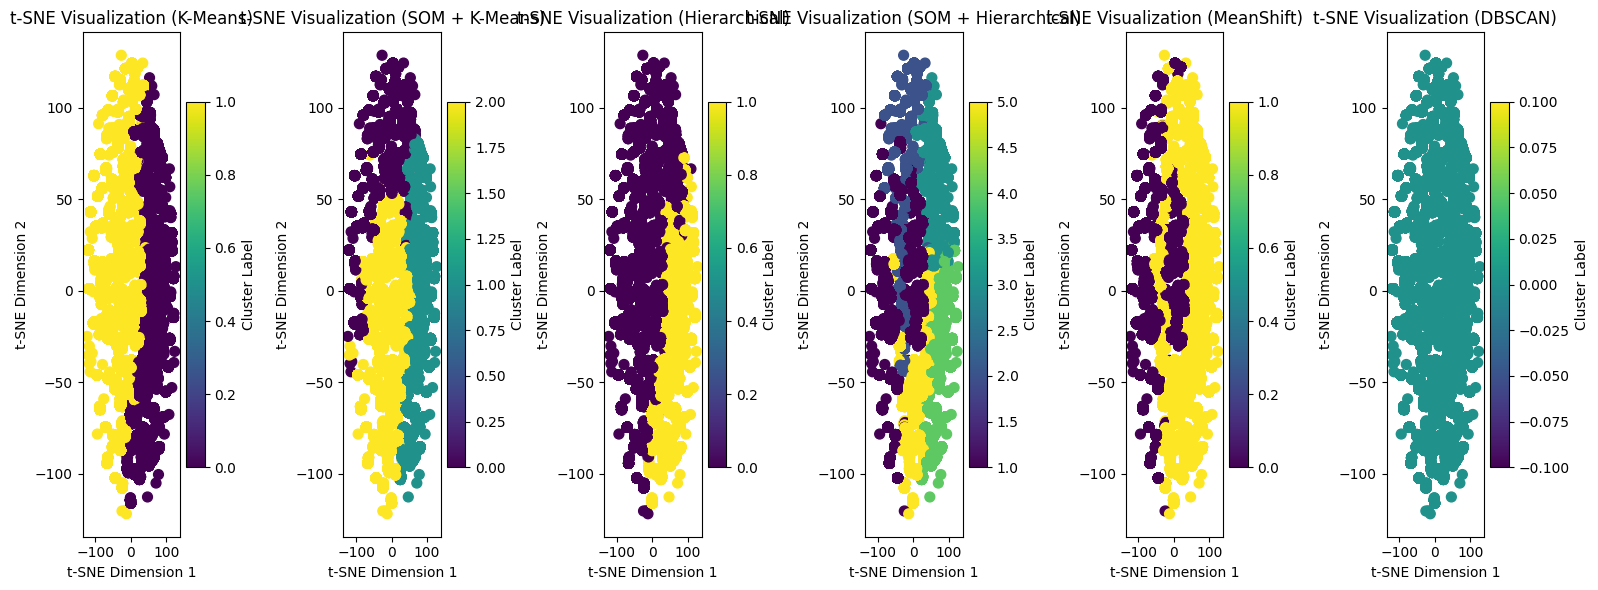

In [23]:
cluster_results_group_1 = {
    'K-Means': cluster_results['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results['som_kmeans_cluster'].values,
    'Hierarchical': cluster_results['hierarchical_cluster'].values,
    'SOM + Hierarchical': cluster_results['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results['mean_shift_cluster'].values,
    'DBSCAN': cluster_results['dbscan_cluster'].values
}

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_1_tsne = tsne.fit_transform(cluster_results.drop(['kmeans_cluster', 'som_kmeans_cluster', 'hierarchical_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

fig, axes = plt.subplots(1, len(cluster_results_group_1), figsize=(16, 6))
if len(cluster_results_group_1) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_1.items()):
    scatter = axes[i].scatter(group_1_tsne[:, 0], group_1_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()

### **Clustering Analysis for Group 1: Customer Demographics**

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 2                     | 0.4479               | 0.8373                   | Clear cluster separation with compact and interpretable clusters.                                         |
| **K-Means on SOM Weights**     | 3                     | 0.3731               | 0.8832                   | Moderate separation; clusters slightly less compact than standard K-Means.                               |
| **Hierarchical**               | 2                     | 0.3860               | 0.8069                   | Clear separation but slightly weaker compactness compared to K-Means.                                     |
| **Hierarchical on SOM Weights**| 5                     | 0.3015               | 0.9228                   | Overlapping clusters and reduced separation quality.                                                      |
| **MeanShift**                  | 2                     | 0.3821               | 1.0018                   | Identified 2 clusters with reasonable separation; slightly higher Davies-Bouldin Index.                  |
| **DBSCAN**                     | 1                     | -                    | -                        | No meaningful clustering identified; all data assigned to a single cluster.                               |

---

## **t-SNE Visualization**

The t-SNE visualizations below illustrate the spatial distribution of clusters across different methods:

1. **K-Means**:
   - Shows 2 compact and distinct clusters with clear separation.
2. **K-Means on SOM Weights**:
   - Displays 3 clusters with moderate separation; slightly overlapping regions.
3. **Hierarchical Clustering**:
   - Clearly separates 2 clusters with reasonable compactness.
4. **Hierarchical on SOM Weights**:
   - Identified 5 clusters; weaker separation with visible overlaps.
5. **MeanShift**:
   - Detected 2 clusters; compact but with less clear separation compared to K-Means.
6. **DBSCAN**:
   - No meaningful clustering identified; all points assigned to a single cluster.

---

## **Key Observations**

- **Cluster Characteristics (K-Means)**:
  - **Cluster 0**:
    - **Customer Age**: Mean = 26.82, Std = 5.68.
    - **Is Chain**: Mean = 3.94 (suggesting frequent chain restaurant orders).
    - Total customers: 10,744.
  - **Cluster 1**:
    - **Customer Age**: Mean = 26.75, Std = 5.72.
    - **Is Chain**: Mean = 1.02 (suggesting infrequent chain restaurant orders).
    - Total customers: 21,025.

- **Performance Summary**:
  - **K-Means** outperformed other methods, providing the best balance between Silhouette Score and Davies-Bouldin Index.
  - **MeanShift** provided similar clustering but with slightly higher Davies-Bouldin Index.
  - **Hierarchical Clustering** performed similarly to K-Means but showed reduced compactness.
  - **SOM-based methods** (K-Means and Hierarchical) displayed weaker separation and compactness.
  - **DBSCAN** failed to identify meaningful clusters for this dataset.

---

## **Selected Clustering Method: K-Means**

- **Silhouette Score**: 0.4479
- **Davies-Bouldin Index**: 0.8373
- **Cluster Characteristics**:
  - K-Means provides interpretable clusters with compact and well-separated groups, making it the most suitable method for this group.
  - Effective for segmenting customers based on demographic factors.

---

# **2. Group 2: Spending Behavior**

## 2.1 K-Means

[⬆️ Back to Top](#top)

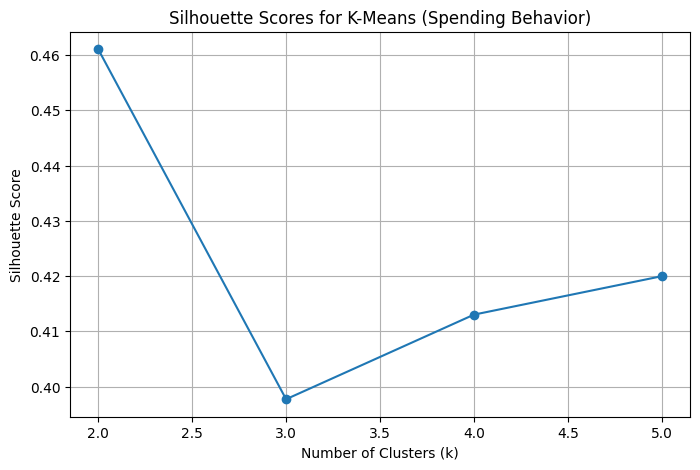

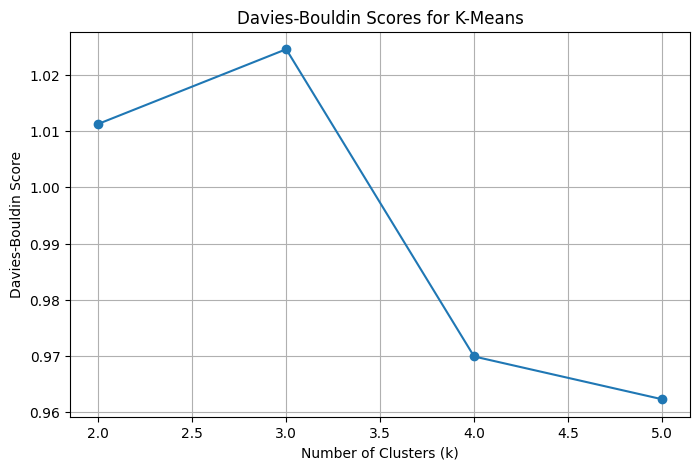

Optimal k (Silhouette Score): 2, Silhouette Score: 0.46105140277512485
Optimal k (Davies-Bouldin Index): 5, Davies-Bouldin Score: 0.9623160651343341
Final chosen k: 2
Consistent Silhouette Score for k=2: 0.46105140277512485


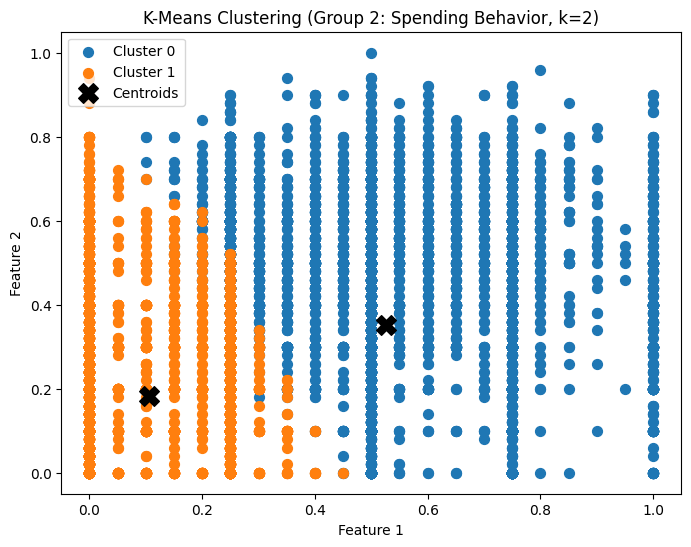

In [24]:
# Initialize a DataFrame to store clustering results for Group 2
cluster_results_group_2 = group_2.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_2)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_2, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_2, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_2, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results_group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results_group_2['kmeans_cluster']):
    cluster_points = group_2[cluster_results_group_2['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 2: Spending Behavior, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 2.2 SOM with K-Means

[⬆️ Back to Top](#top)

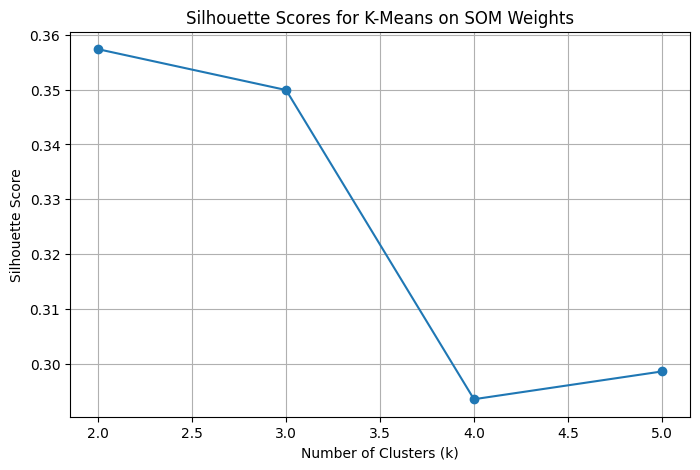

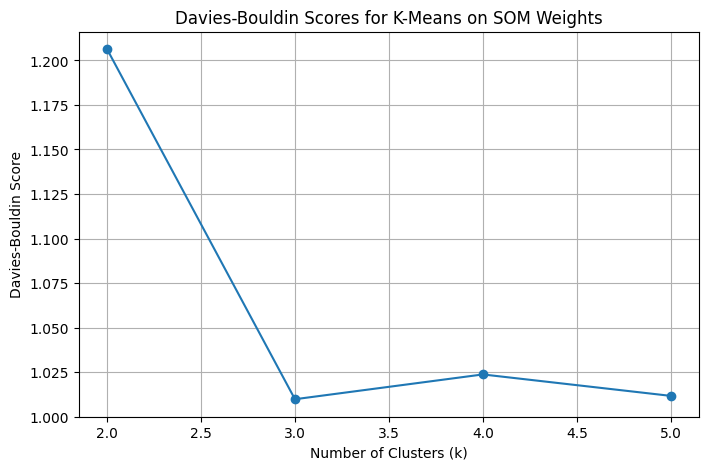

Optimal k (Silhouette Score): 2, Silhouette Score: 0.3574
Optimal k (Davies-Bouldin Index): 3, Davies-Bouldin Score: 1.0097
Final chosen k: 2
Consistent Silhouette Score for k=2: 0.3574


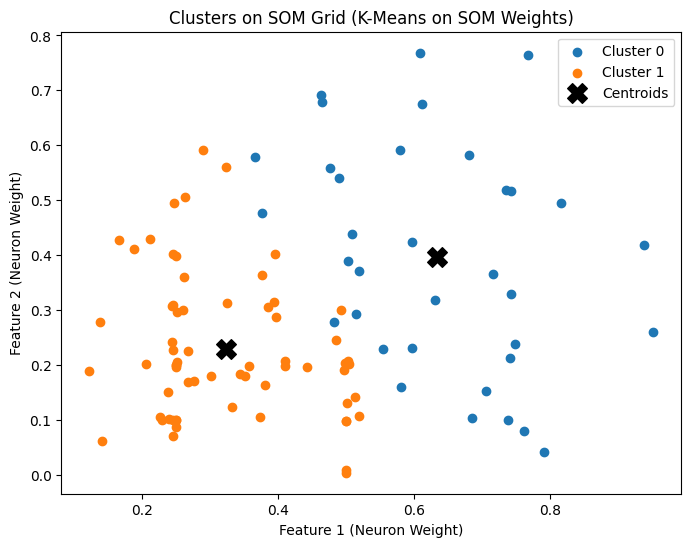

Cluster Summary:
                    weekend_spending  week_spending  Total_Cuisine_Orders
som_kmeans_cluster                                                       
0                           0.617448       0.441538              0.260213
1                           0.157224       0.192925              0.119572


In [25]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(data=group_2.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_2.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results_group_2
cluster_results_group_2['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_2.groupby(cluster_results_group_2['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)


## 2.3 Hierarchical (Agglomerative Clustering)

Optimal k (Silhouette Score): 2, Silhouette Score: 0.4648
Optimal k (Davies-Bouldin Score): 2, Davies-Bouldin Score: 0.9782
Hierarchical Clustering Silhouette Score (Group 2): 0.4648
Hierarchical Clustering Davies-Bouldin Score (Group 2): 0.9782


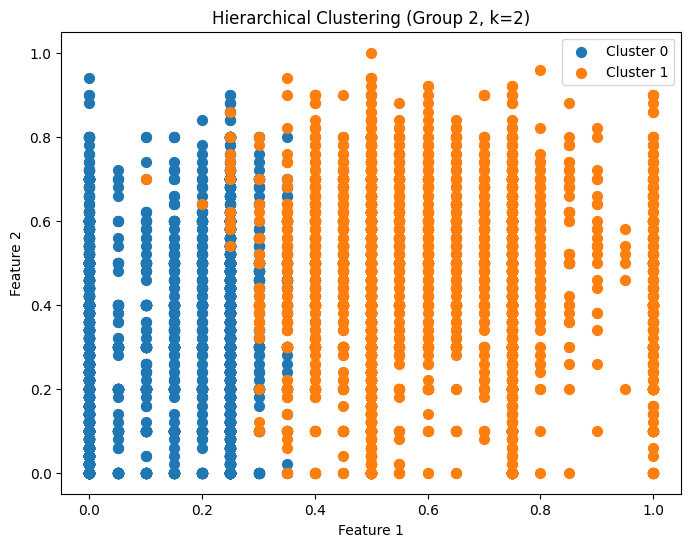

In [26]:
# ======= Hierarchical Clustering for Group 2 =======

possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

# Iterate through possible cluster counts
for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_2)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_2, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_2, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette
    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

# Perform hierarchical clustering
if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_2)

    cluster_results_group_2['hierarchical_cluster_group_2'] = hierarchical_labels

    silhouette_score_hierarchical = silhouette_score(group_2, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_2, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 2): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 2): {davies_bouldin_score_hierarchical:.4f}")

    # Plot clusters
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_2[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 2, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

## 2.4 Hierarchical clustering with SOM

[⬆️ Back to Top](#top)

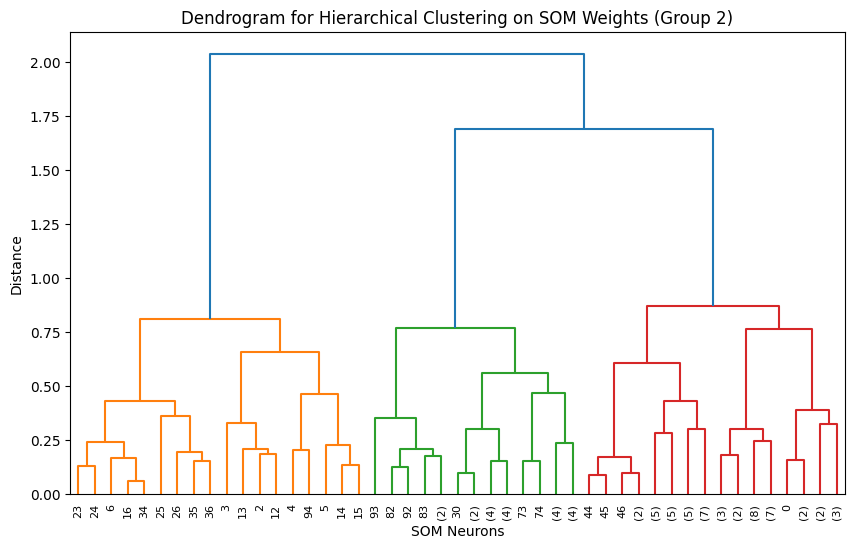

Optimal k (Silhouette Score): 2, Silhouette Score: 0.3885
Optimal k (Davies-Bouldin Score): 3, Davies-Bouldin Score: 1.0602


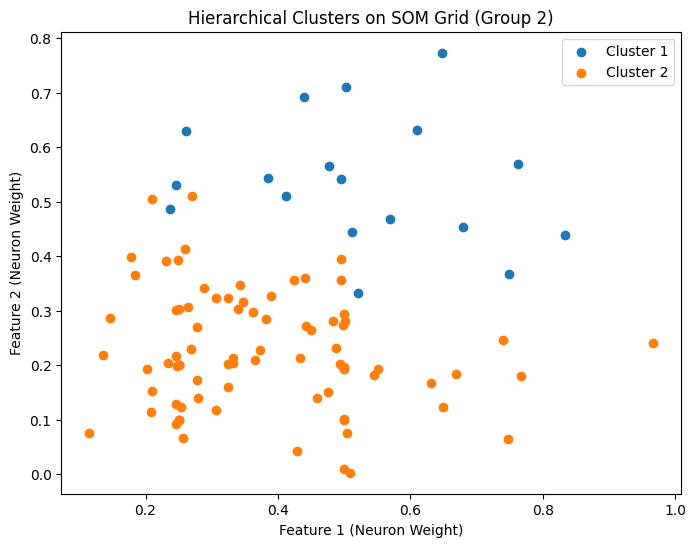

Cluster Summary (SOM + Hierarchical Clustering):
                          weekend_spending  week_spending  \
som_hierarchical_cluster                                    
1                                 0.523166       0.546923   
2                                 0.186494       0.185819   

                          Total_Cuisine_Orders  
som_hierarchical_cluster                        
1                                     0.293723  
2                                     0.119380  


In [27]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(group_2.values, 1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Perform hierarchical clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 2)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate scores if more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine logic if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Map hierarchical clusters back to group_2
    data_hierarchical_clusters = []
    for row in group_2.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add Hierarchical results to cluster_results_group_2
    cluster_results_group_2['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == cluster, 0],
            som_weights[hierarchical_labels == cluster, 1],
            label=f'Cluster {cluster}'
        )
    plt.title("Hierarchical Clusters on SOM Grid (Group 2)")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    cluster_summary = group_2.groupby(cluster_results_group_2['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(cluster_summary)


## 2.5 Meanshift

[⬆️ Back to Top](#top)

Number of clusters identified by MeanShift (Group 2): 4
MeanShift Silhouette Score (Group 2): 0.3665
MeanShift Davies-Bouldin Score (Group 2): 1.0803


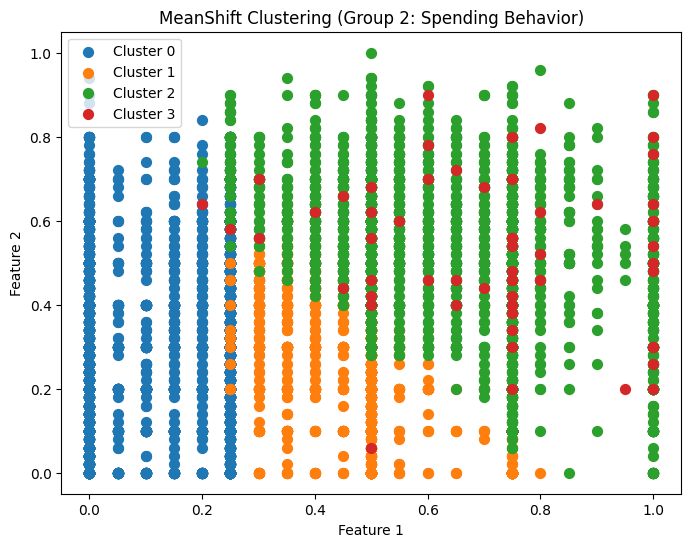

Cluster Summary (MeanShift):
   weekend_spending  week_spending  Total_Cuisine_Orders
0          0.111534       0.197895              0.117831
1          0.499764       0.171418              0.151565
2          0.628455       0.491502              0.261604
3          0.720968       0.528710              0.753125


In [28]:
# ======= MeanShift Clustering =======
bandwidth = estimate_bandwidth(group_2, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_2)
cluster_results_group_2['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 2): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_2, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_2, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 2): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 2): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_2[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_2.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")


## 2.6 DBSCAN

[⬆️ Back to Top](#top)

Number of clusters identified by DBSCAN (Group 2): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


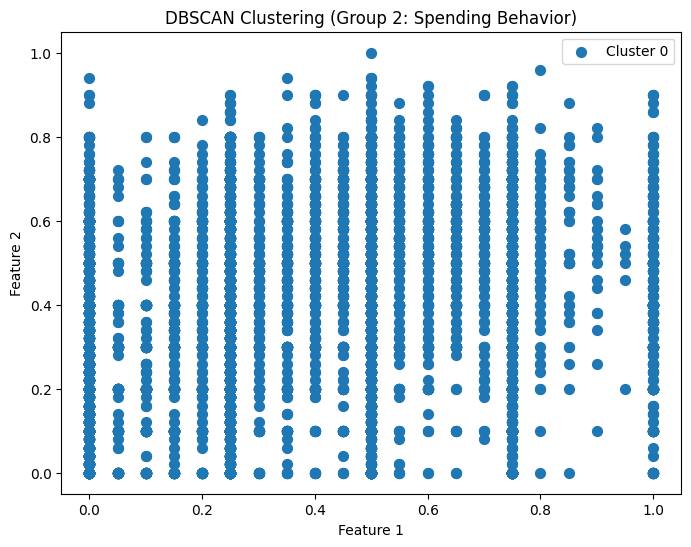

No meaningful clustering identified.


In [29]:
# ======= DBSCAN Clustering =======
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_2)
cluster_results_group_2['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 2): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_2[group_2['dbscan_cluster'] != -1],
        group_2[group_2['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_2[group_2['dbscan_cluster'] != -1],
        group_2[group_2['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    print(f"DBSCAN Silhouette Score (Group 2): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 2): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_2[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_2[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_2[group_2['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")


## Analysis

In [30]:
# Define the features to summarize for Group 2
features_to_summarize = ['weekend_spending', 'week_spending', 'Total_Cuisine_Orders']

# K-Means
group2_clusters_kmeans = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group2_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

weekend_spending                         week_spending         \
                           mean median       std  count          mean median   
kmeans_cluster                                                                 
0                      2.106183    2.0  0.692402   9365      3.513017    3.6   
1                      0.421568    0.0  0.489000  22404      1.821175    2.0   

                                Total_Cuisine_Orders                           
                     std  count                 mean median        std  count  
kmeans_cluster                                                                 
0               2.173664   9365            40.941875  35.73  28.047985   9365  
1               1.253794  22404            20.758006  17.93  15.825953  22404

In [31]:
# SOM + K-Means
group2_clusters_som_kmeans = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group2_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans

weekend_spending                         week_spending  \
                               mean median       std  count          mean   
som_kmeans_cluster                                                          
0                          2.469792    2.2  0.662001   4992      4.415385   
1                          0.628898    0.8  0.673416  26777      1.929245   

                                           Total_Cuisine_Orders         \
                   median       std  count                 mean median   
som_kmeans_cluster                                                       
0                     4.4  1.880490   4992            49.055433  43.58   
1                     2.0  1.429402  26777            22.541670  18.41   

                                      
                          std  count  
som_kmeans_cluster                    
0                   29.891992   4992  
1                   17.553864  26777

In [32]:
# Hierarchical
group2_clusters_hierarchical = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'hierarchical_cluster_group_2')
cluster_summary_hierarchical = summarize_cluster_dataframe(group2_clusters_hierarchical, 'hierarchical_cluster_group_2', features_to_summarize)
cluster_summary_hierarchical

weekend_spending                          \
                                         mean median       std  count   
hierarchical_cluster_group_2                                            
0                                    0.456039    0.0  0.495975  23769   
1                                    2.291200    2.0  0.568404   8000   

                             week_spending                          \
                                      mean median       std  count   
hierarchical_cluster_group_2                                         
0                                 2.014044    2.0  1.469411  23769   
1                                 3.228650    3.0  2.185748   8000   

                             Total_Cuisine_Orders                           
                                             mean median        std  count  
hierarchical_cluster_group_2                                                
0                                       22.590845  18.27  18.300411  23769  
1                                       38.940155  32.95  27.633757   8000

In [33]:
# SOM + Hierarchical
group2_clusters_som_hierarchical = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group2_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

weekend_spending                          \
                                     mean median       std  count   
som_hierarchical_cluster                                            
1                                2.092664    2.0  0.884895   4062   
2                                0.745978    1.0  0.827770  27707   

                         week_spending                          \
                                  mean median       std  count   
som_hierarchical_cluster                                         
1                             5.469227    5.2  1.342691   4062   
2                             1.858195    2.0  1.272298  27707   

                         Total_Cuisine_Orders                           
                                         mean median        std  count  
som_hierarchical_cluster                                                
1                                   55.372592  52.93  29.926295   4062  
2                                   22.505488  18.50  17.208127  27707

In [34]:
# MeanShift
group2_clusters_mean_shift = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_mean_shift = summarize_cluster_dataframe(group2_clusters_mean_shift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_mean_shift

weekend_spending                         week_spending  \
                               mean median       std  count          mean   
mean_shift_cluster                                                          
0                          0.446136    0.0  0.490628  23474      1.978947   
1                          1.999055    2.0  0.297725   4232      1.714178   
2                          2.513822    2.4  0.692511   4001      4.915021   
3                          2.883871    3.0  0.850495     62      5.287097   

                                           Total_Cuisine_Orders          \
                   median       std  count                 mean  median   
mean_shift_cluster                                                        
0                     2.0  1.423268  23474            22.213492   18.21   
1                     2.0  1.277771   4232            28.572968   24.06   
2                     5.0  1.727651   4001            49.317671   45.40   
3                     5.5  1.790547     62           141.979194  141.75   

                                      
                          std  count  
mean_shift_cluster                    
0                   17.670441  23474  
1                   20.417961   4232  
2                   28.260768   4001  
3                   19.104691     62

In [35]:
# DBSCAN
group2_clusters_dbscan = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group2_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

weekend_spending                         week_spending         \
                           mean median       std  count          mean median   
dbscan_cluster                                                                 
0                      0.918166    1.0  0.948646  31769      2.319903    2.0   

                                Total_Cuisine_Orders                           
                     std  count                 mean median        std  count  
dbscan_cluster                                                                 
0               1.759641  31769            26.707892  20.17  22.208242  31769

## 2.7 t-SNE

[⬆️ Back to Top](#top)

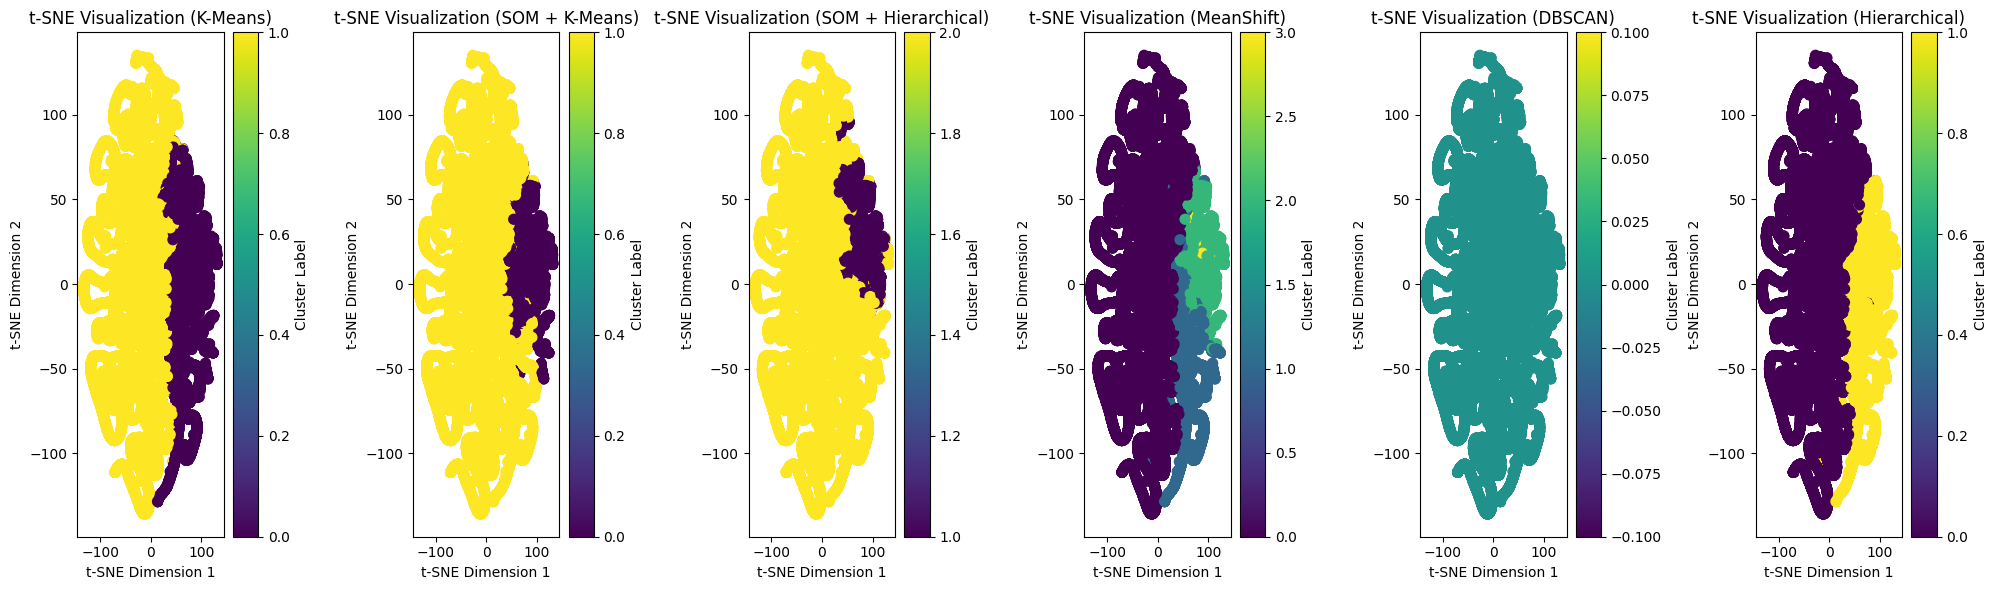

In [36]:
# Combine clustering labels into a dictionary for Group 2
cluster_results_group_2_dict = {
    'K-Means': cluster_results_group_2['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results_group_2['som_kmeans_cluster'].values,
    'SOM + Hierarchical': cluster_results_group_2['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results_group_2['mean_shift_cluster'].values,
    'DBSCAN': cluster_results_group_2['dbscan_cluster'].values,
    'Hierarchical': cluster_results_group_2['hierarchical_cluster_group_2'].values  # Add Hierarchical clustering
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_2_tsne = tsne.fit_transform(cluster_results_group_2.drop(
    ['kmeans_cluster', 'som_kmeans_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster', 'hierarchical_cluster_group_2'], 
    axis=1))

# Visualize the t-SNE results for all clustering methods
fig, axes = plt.subplots(1, len(cluster_results_group_2_dict), figsize=(20, 6))
if len(cluster_results_group_2_dict) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_2_dict.items()):
    scatter = axes[i].scatter(group_2_tsne[:, 0], group_2_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()

### **Clustering Analysis for Group 2: Spending Behavior**

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 2                     | 0.4610               | 0.9623                   | Clear cluster separation with compact and interpretable clusters.                                         |
| **K-Means on SOM Weights**     | 2                     | 0.3574               | 1.0097                   | Moderate separation; clusters less compact than standard K-Means.                                        |
| **Hierarchical**               | 2                     | 0.4648               | 0.9782                   | Best silhouette score; compact and well-separated clusters.                                               |
| **Hierarchical on SOM Weights**| 2                     | 0.3885               | 1.0602                   | Reasonable separation but weaker compactness compared to standard Hierarchical.                          |
| **MeanShift**                  | 4                     | 0.3665               | 1.0803                   | Identified finer-grained clusters but with overlapping regions.                                           |
| **DBSCAN**                     | 1                     | -                    | -                        | No meaningful clustering identified; all data assigned to a single cluster.                               |

---

## **t-SNE Visualization**

The t-SNE visualizations below illustrate the spatial distribution of clusters across different methods:

1. **K-Means**:
   - Shows 2 compact clusters with clear separation.
2. **K-Means on SOM Weights**:
   - Displays 2 clusters with moderate separation and slightly overlapping regions.
3. **Hierarchical Clustering**:
   - Best silhouette score; 2 compact and well-separated clusters.
4. **Hierarchical on SOM Weights**:
   - Identified 2 clusters but with less clear separation.
5. **MeanShift**:
   - Detected 4 clusters with finer granularity but overlapping regions.
6. **DBSCAN**:
   - No meaningful clustering identified; all points assigned to a single cluster.

---

## **Key Observations**

- **Cluster Characteristics (Hierarchical Clustering)**:
  - **Cluster 0**:
    - **Weekend Spending**: Mean = 0.4560, Std = 0.4960.
    - **Week Spending**: Mean = 2.0140, Std = 1.4694.
    - **Total Cuisine Orders**: Mean = 22.59, Std = 18.30.
    - Total customers: 23,769.
  - **Cluster 1**:
    - **Weekend Spending**: Mean = 2.2912, Std = 0.5684.
    - **Week Spending**: Mean = 3.2287, Std = 2.1857.
    - **Total Cuisine Orders**: Mean = 38.94, Std = 27.63.
    - Total customers: 8,000.

- **Performance Summary**:
  - **Hierarchical Clustering** provided the best silhouette score, making it the most interpretable method.
  - **K-Means** showed slightly lower silhouette scores but achieved comparable clustering quality.
  - **MeanShift** identified additional clusters but with reduced compactness and overlapping.
  - **SOM-based methods** (K-Means and Hierarchical) displayed weaker separation compared to standard methods.
  - **DBSCAN** failed to form meaningful clusters for this dataset.

---

## **Selected Clustering Method: Hierarchical Clustering**

- **Silhouette Score**: 0.4648
- **Davies-Bouldin Index**: 0.9782
- **Cluster Characteristics**:
  - Hierarchical Clustering provided well-separated clusters with the best silhouette score, making it the most suitable for this group.
  - Effective for segmenting customers based on spending behavior patterns.

---

# **3. Group 3: Order Timing & Promotions**

## 3.1 K-Means

[⬆️ Back to Top](#top)

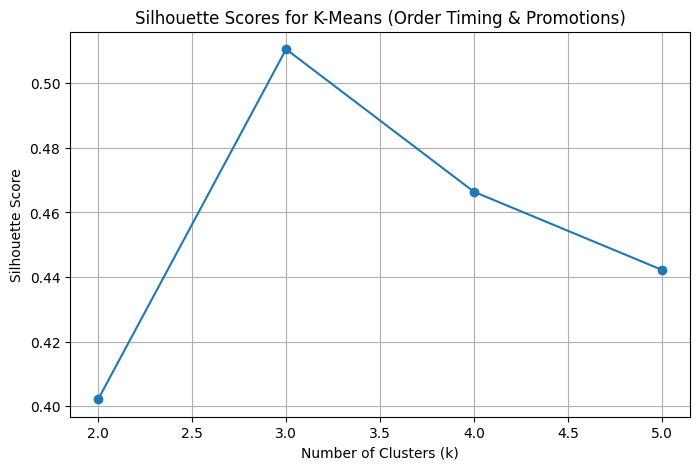

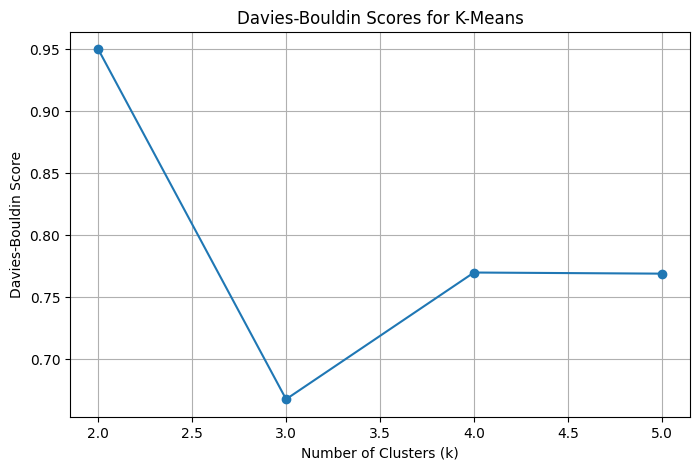

Optimal k (Silhouette Score): 3, Silhouette Score: 0.510545341167261
Optimal k (Davies-Bouldin Index): 3, Davies-Bouldin Score: 0.6671732542917285
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.510545341167261


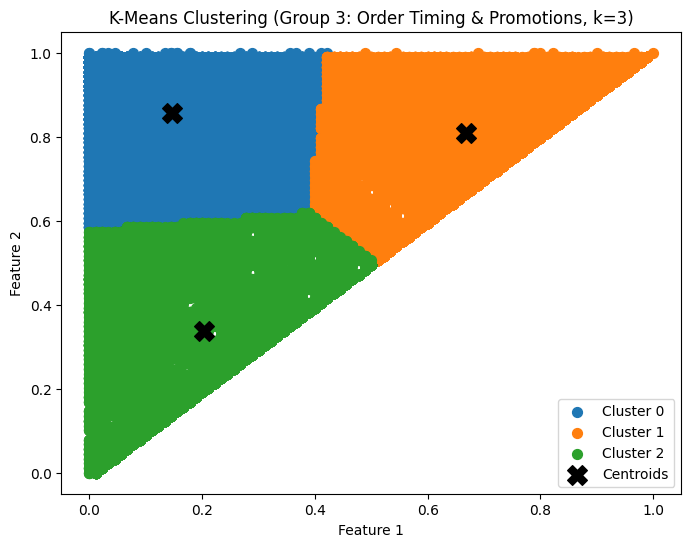

In [37]:
# Initialize a DataFrame to store clustering results for Group 3
cluster_results_group_3 = group_3.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_3)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_3, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_3, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_3, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results_group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results_group_3['kmeans_cluster']):
    cluster_points = group_3[cluster_results_group_3['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 3: Order Timing & Promotions, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 3.2 SOM with K-Means

[⬆️ Back to Top](#top)

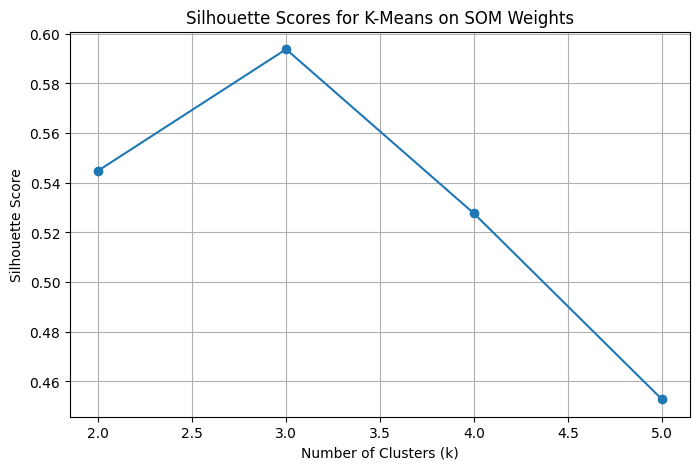

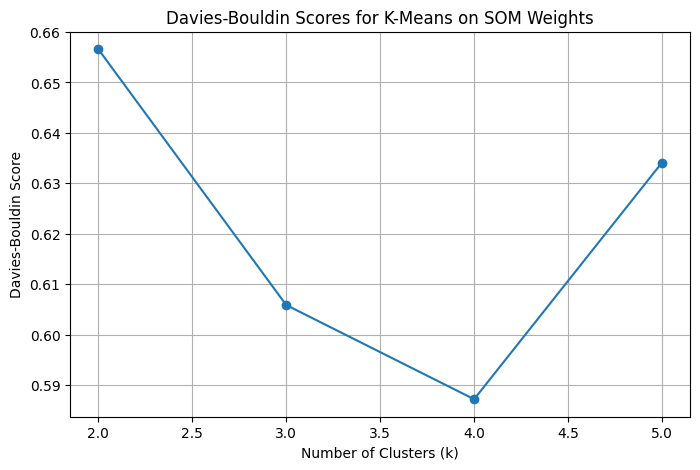

Optimal k (Silhouette Score): 3, Silhouette Score: 0.5938
Optimal k (Davies-Bouldin Index): 4, Davies-Bouldin Score: 0.5872
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.5938


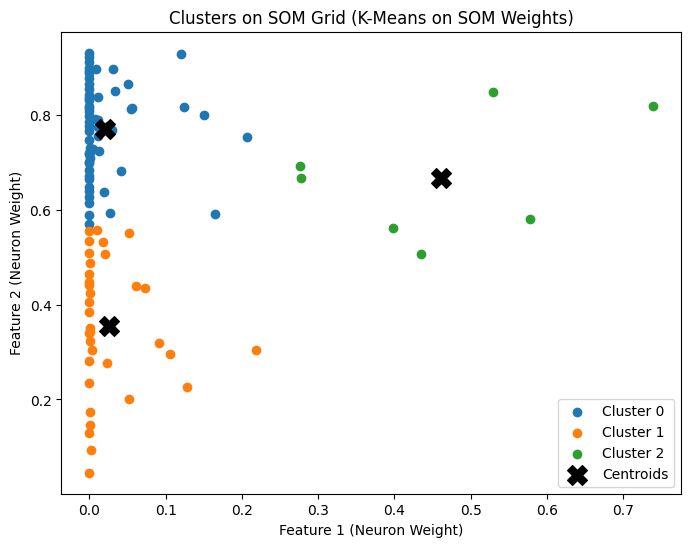

Cluster Summary:
                    first_order  last_order
som_kmeans_cluster                         
0                      0.118038    0.851281
1                      0.142152    0.274875
2                      0.580471    0.760691


In [38]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(data=group_3.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_3.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results_group_3
cluster_results_group_3['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_3.groupby(cluster_results_group_3['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)


## 3.3 Hierarchical

Optimal k (Silhouette Score): 3, Silhouette Score: 0.4604
Optimal k (Davies-Bouldin Score): 4, Davies-Bouldin Score: 0.7643
Hierarchical Clustering Silhouette Score (Group 3): 0.4604
Hierarchical Clustering Davies-Bouldin Score (Group 3): 0.7818


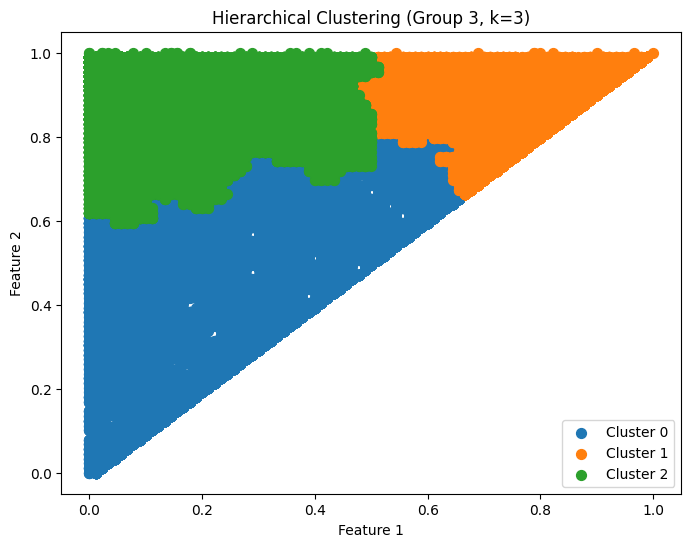

In [39]:
# ======= Hierarchical Clustering for Group 3 =======

possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_3)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_3, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_3, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette
    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_3)

    cluster_results_group_3['hierarchical_cluster_group_3'] = hierarchical_labels

    silhouette_score_hierarchical = silhouette_score(group_3, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_3, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 3): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 3): {davies_bouldin_score_hierarchical:.4f}")

    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_3[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 3, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

## 3.4 Hierarchical with SOM

[⬆️ Back to Top](#top)

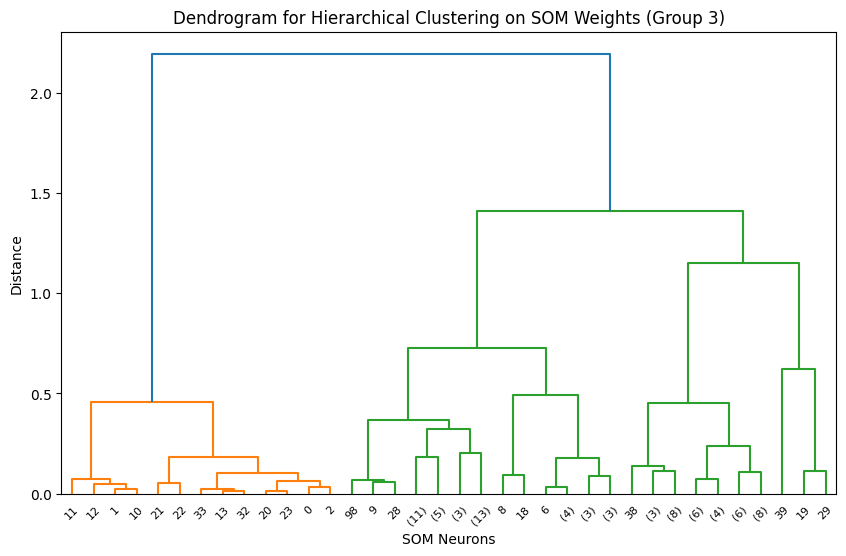

Optimal k (Silhouette Score): 2, Silhouette Score: 0.5744
Optimal k (Davies-Bouldin Score): 2, Davies-Bouldin Score: 0.4901


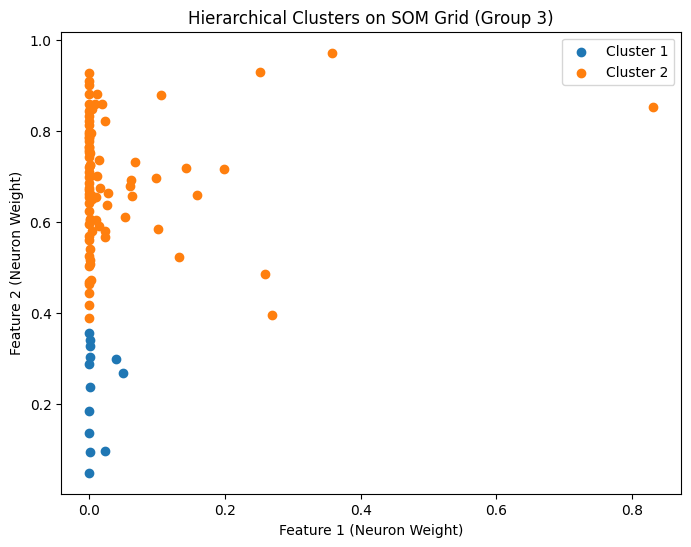

Cluster Summary (SOM + Hierarchical Clustering):
                          first_order  last_order
som_hierarchical_cluster                         
1                            0.097338    0.166348
2                            0.339077    0.762677


In [40]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(group_3.values, 1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Perform hierarchical clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 3)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate scores if more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine logic if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Map hierarchical clusters back to group_3
    data_hierarchical_clusters = []
    for row in group_3.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add Hierarchical results to cluster_results_group_3
    cluster_results_group_3['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == cluster, 0],
            som_weights[hierarchical_labels == cluster, 1],
            label=f'Cluster {cluster}'
        )
    plt.title("Hierarchical Clusters on SOM Grid (Group 3)")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    cluster_summary = group_3.groupby(cluster_results_group_3['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(cluster_summary)


## 3.5 MeanShift

[⬆️ Back to Top](#top)

Number of clusters identified by MeanShift (Group 3): 3
MeanShift Silhouette Score (Group 3): 0.4873
MeanShift Davies-Bouldin Score (Group 3): 0.6873


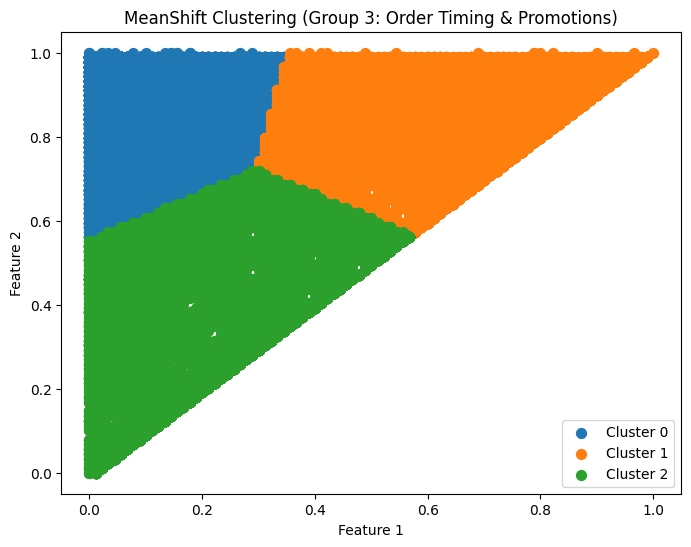

Cluster Summary (MeanShift):
   first_order  last_order
0     0.114510    0.868122
1     0.638722    0.836507
2     0.232054    0.376933


In [41]:
# ======= MeanShift Clustering =======
bandwidth = estimate_bandwidth(group_3, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_3)
cluster_results_group_3['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 3): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_3, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_3, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 3): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 3): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_3[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 3: Order Timing & Promotions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_3.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")


## 3.6 DBSCAN

[⬆️ Back to Top](#top)

Number of clusters identified by DBSCAN (Group 3): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


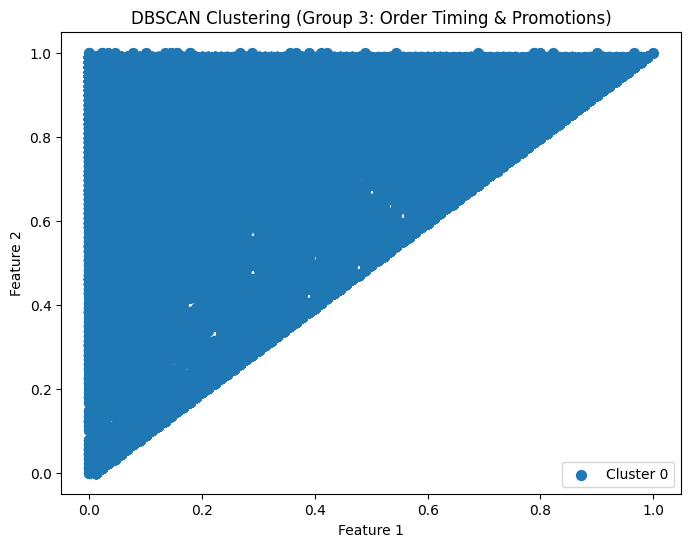

No meaningful clustering identified.


In [42]:
# ======= DBSCAN Clustering =======
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_3)
cluster_results_group_3['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 3): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_3[group_3['dbscan_cluster'] != -1],
        group_3[group_3['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_3[group_3['dbscan_cluster'] != -1],
        group_3[group_3['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    print(f"DBSCAN Silhouette Score (Group 3): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 3): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_3[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_3[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 3: Order Timing & Promotions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_3[group_3['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")


## Analysis

In [44]:
# Define the features to summarize for Group 3
features_to_summarize = ['first_order', 'last_order']

# K-Means
group3_clusters_kmeans = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group3_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

first_order                          last_order         \
                      mean median        std  count       mean median   
kmeans_cluster                                                          
0                13.258003   10.0  10.730491  14058  77.173922   80.0   
1                60.172795   59.0  14.370228   9410  73.087779   75.0   
2                18.293459   17.0  12.640789   8301  30.946874   33.0   

                                  
                      std  count  
kmeans_cluster                    
0                9.988853  14058  
1               12.105900   9410  
2               14.308063   8301

In [45]:
# SOM + K-Means
group3_clusters_som_kmeans = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group3_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans


first_order                          last_order         \
                          mean median        std  count       mean median   
som_kmeans_cluster                                                          
0                    10.623389    9.0   8.406639  12570  76.764041   80.0   
1                    12.793643   11.0   9.350730   5883  25.463879   26.0   
2                    52.242415   49.0  17.507347  13316  68.701487   70.0   

                                      
                          std  count  
som_kmeans_cluster                    
0                   11.189620  12570  
1                   13.071333   5883  
2                   15.280829  13316

In [46]:
# Hierarchical Clustering
group3_clusters_hierarchical = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'hierarchical_cluster_group_3')
cluster_summary_hierarchical = summarize_cluster_dataframe(group3_clusters_hierarchical, 'hierarchical_cluster_group_3', features_to_summarize)
cluster_summary_hierarchical

first_order                          last_order  \
                                    mean median        std  count       mean   
hierarchical_cluster_group_3                                                   
0                              24.837903   24.0  16.771908  11561  38.435083   
1                              67.887609   68.0  11.742941   5988  78.246326   
2                              14.824121   11.0  12.653483  14220  78.528129   

                                                       
                             median        std  count  
hierarchical_cluster_group_3                           
0                              41.0  17.323803  11561  
1                              80.0   8.229663   5988  
2                              81.0   8.871898  14220

In [47]:
# SOM + Hierarchical
group3_clusters_som_hierarchical = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group3_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

first_order                          last_order  \
                                mean median        std  count       mean   
som_hierarchical_cluster                                                   
1                           8.760455    8.0   5.744868   2989  15.804951   
2                          30.516887   26.0  24.360143  28780  68.878249   

                                                   
                         median        std  count  
som_hierarchical_cluster                           
1                          15.0   8.727836   2989  
2                          74.0  17.596754  28780

In [48]:
# MeanShift
group3_clusters_mean_shift = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_mean_shift = summarize_cluster_dataframe(group3_clusters_mean_shift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_mean_shift

first_order                          last_order         \
                          mean median        std  count       mean median   
mean_shift_cluster                                                          
0                    10.305874    8.0   8.483975  11933  78.262884   81.0   
1                    57.485000   57.0  16.518959  10033  75.449118   77.0   
2                    20.884831   20.0  13.974891   9803  34.547077   36.0   

                                      
                          std  count  
mean_shift_cluster                    
0                    9.364819  11933  
1                   10.142064  10033  
2                   15.782840   9803

In [49]:
# DBSCAN
group3_clusters_dbscan = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group3_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

first_order                          last_order         \
                      mean median        std  count       mean median   
dbscan_cluster                                                          
0                28.469924   22.0  24.104626  31769  63.884825   71.0   

                                  
                      std  count  
dbscan_cluster                    
0               22.973185  31769

## 3.7 t-SNE

[⬆️ Back to Top](#top)

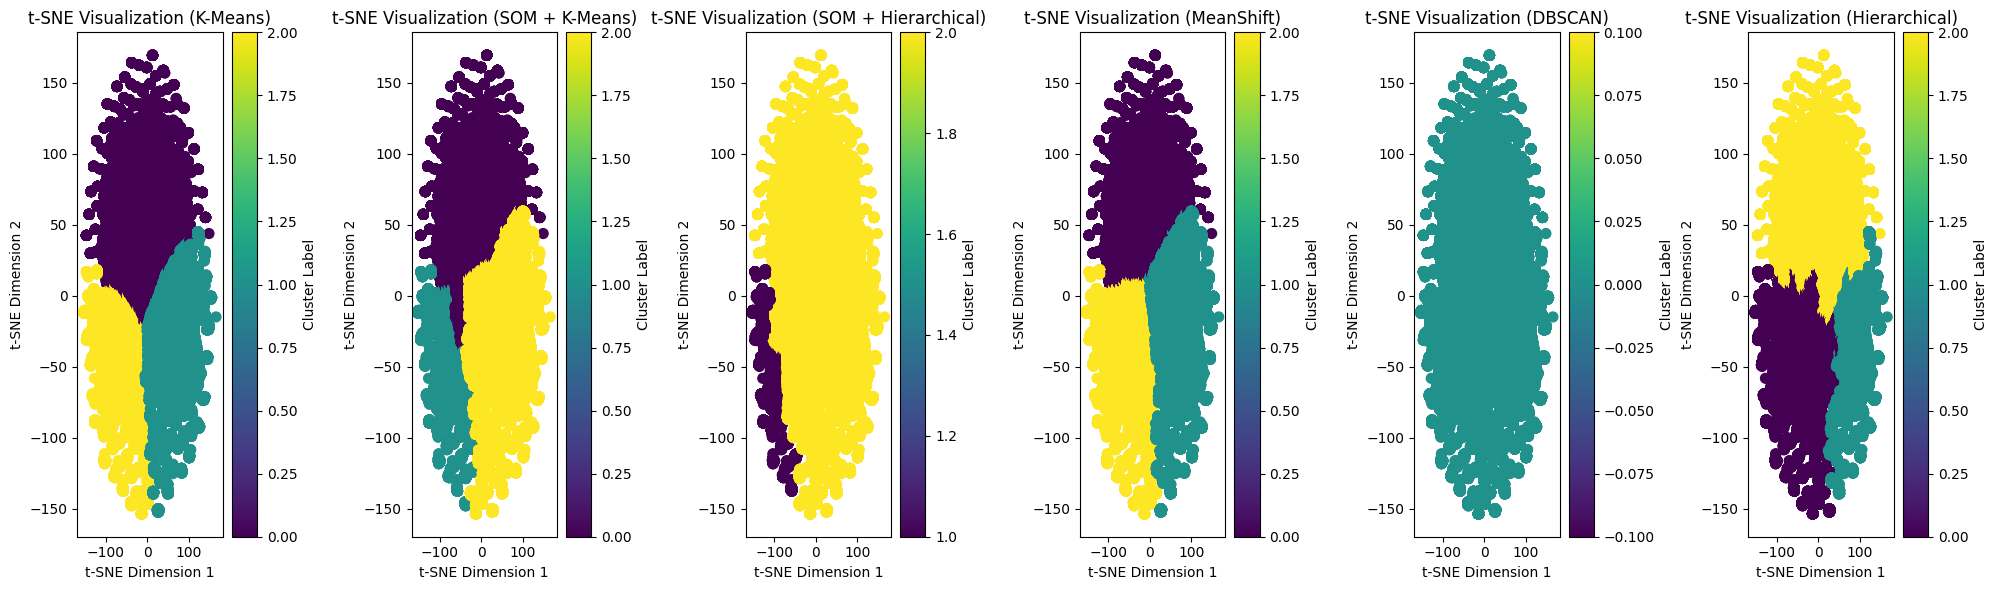

In [50]:
# Combine clustering labels into a dictionary for Group 3
cluster_results_group_3_dict = {
    'K-Means': cluster_results_group_3['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results_group_3['som_kmeans_cluster'].values,
    'SOM + Hierarchical': cluster_results_group_3['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results_group_3['mean_shift_cluster'].values,
    'DBSCAN': cluster_results_group_3['dbscan_cluster'].values,
    'Hierarchical': cluster_results_group_3['hierarchical_cluster_group_3'].values  # Add Hierarchical clustering
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_3_tsne = tsne.fit_transform(cluster_results_group_3.drop(
    ['kmeans_cluster', 'som_kmeans_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster', 'hierarchical_cluster_group_3'], 
    axis=1))

# Visualize the t-SNE results for all clustering methods
fig, axes = plt.subplots(1, len(cluster_results_group_3_dict), figsize=(20, 6))
if len(cluster_results_group_3_dict) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_3_dict.items()):
    scatter = axes[i].scatter(group_3_tsne[:, 0], group_3_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()


# **Clustering Analysis for Group 3: Order Timing & Promotions**

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 3                     | 0.5105               | 0.6671                   | Well-defined clusters, clear separation.                                                                  |
| **K-Means on SOM Weights**     | 3                     | 0.5938               | 0.5872                   | Compact and distinct clusters. Best silhouette score.                                                     |
| **Hierarchical**               | 3                     | 0.4604               | 0.7818                   | Moderate separation with some overlapping.                                                                |
| **Hierarchical on SOM Weights**| 2                     | 0.5744               | 0.4901                   | Fewer clusters with good compactness and separation.                                                      |
| **MeanShift**                  | 3                     | 0.4873               | 0.6873                   | Moderate separation, compact clusters.                                                                    |
| **DBSCAN**                     | 1                     | -                    | -                        | No meaningful clustering identified; all data assigned to a single cluster.                               |

---

## **t-SNE Visualization**

The t-SNE visualizations below illustrate the spatial distribution of clusters across different methods:

1. **K-Means**:
   - Displays 3 clear clusters with good separation.
   - Compact and interpretable clustering.
2. **K-Means on SOM Weights**:
   - Achieves the best silhouette score among methods.
   - Clusters are compact and distinct.
3. **Hierarchical Clustering**:
   - 3 clusters with moderate separation and some overlaps.
4. **Hierarchical on SOM Weights**:
   - 2 clusters with excellent compactness and separation.
5. **MeanShift**:
   - Identifies 3 clusters, but with less compactness than SOM-based K-Means.
6. **DBSCAN**:
   - No meaningful clustering identified; all data points are in a single cluster.

---

## **Key Observations**

- **Cluster Characteristics (SOM + K-Means)**:
  - **Cluster 0**:
    - **First Order**: Mean = 10.62, Median = 9.
    - **Last Order**: Mean = 76.76, Median = 80.
    - Total customers: 12,570.
  - **Cluster 1**:
    - **First Order**: Mean = 12.79, Median = 11.
    - **Last Order**: Mean = 25.46, Median = 26.
    - Total customers: 5,883.
  - **Cluster 2**:
    - **First Order**: Mean = 52.24, Median = 49.
    - **Last Order**: Mean = 68.70, Median = 70.
    - Total customers: 13,316.

- **Performance Summary**:
  - **K-Means on SOM Weights** achieves the best silhouette score, making it the most reliable method for this group.
  - **Hierarchical Clustering on SOM Weights** also performs well but identifies only 2 clusters.
  - **DBSCAN** fails to provide meaningful clustering, while MeanShift results are moderate but less compact.

---

## **Selected Clustering Method: SOM + K-Means**

- **Silhouette Score**: 0.5938
- **Davies-Bouldin Index**: 0.5872
- **Cluster Characteristics**:
  - Provides compact and well-separated clusters, making it suitable for analysis.
  - Aligns well with business objectives by clearly distinguishing customers based on their ordering activity.

---

# **4. Group 4: Cuisine Preferences & Diversity**

## 4.1 K-Means

[⬆️ Back to Top](#top)

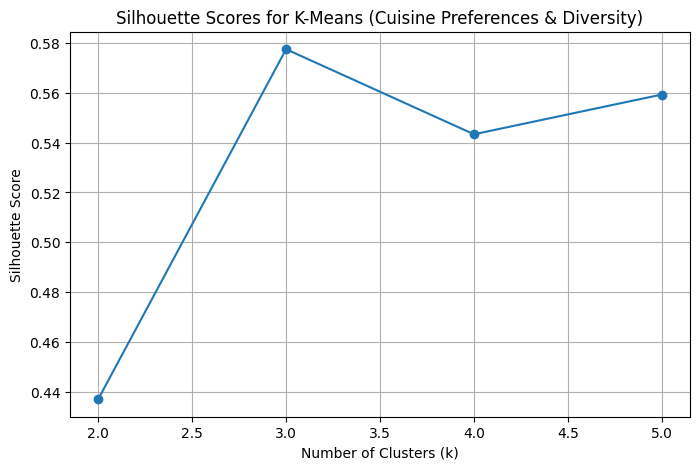

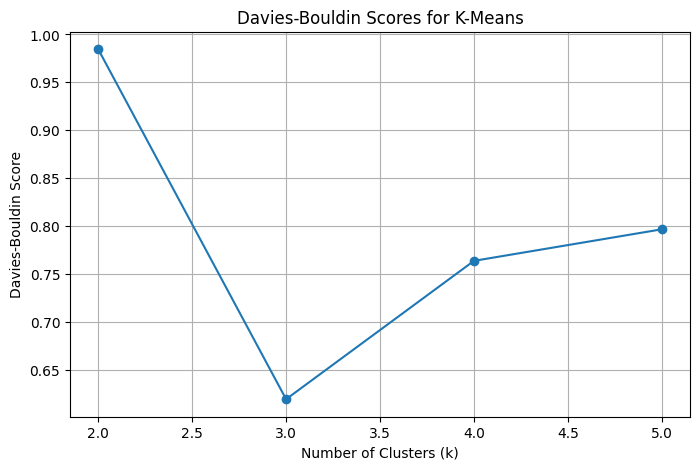

Optimal k (Silhouette Score): 3, Silhouette Score: 0.5774721615214616
Optimal k (Davies-Bouldin Index): 3, Davies-Bouldin Score: 0.6194315363909451
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.5774721615214616


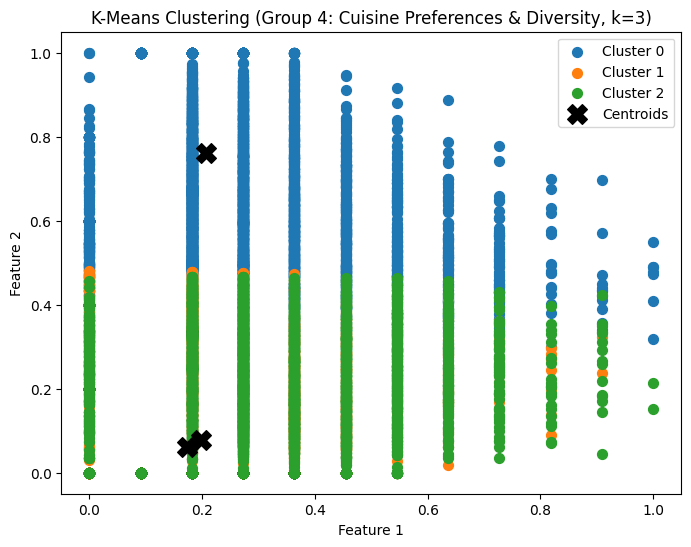

In [51]:
# Initialize a DataFrame to store clustering results for Group 4
cluster_results_group_4 = group_4.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_4)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_4, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_4, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Cuisine Preferences & Diversity)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_4, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results_group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results_group_4['kmeans_cluster']):
    cluster_points = group_4[cluster_results_group_4['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 4: Cuisine Preferences & Diversity, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## 4.2 SOM with K-Means

[⬆️ Back to Top](#top)

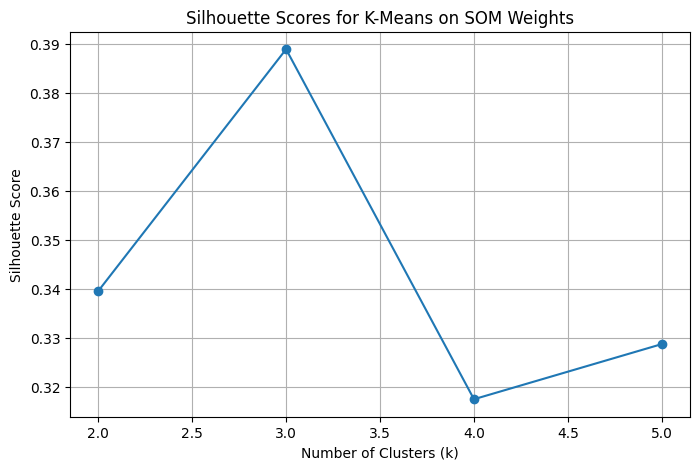

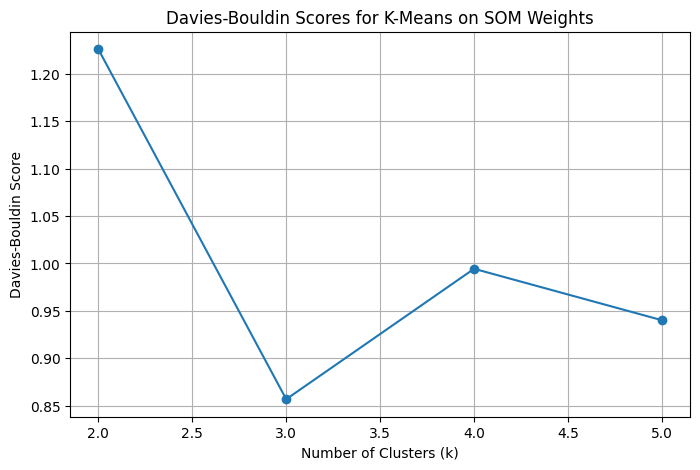

Optimal k (Silhouette Score): 3, Silhouette Score: 0.3889
Optimal k (Davies-Bouldin Index): 3, Davies-Bouldin Score: 0.8568
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.3889


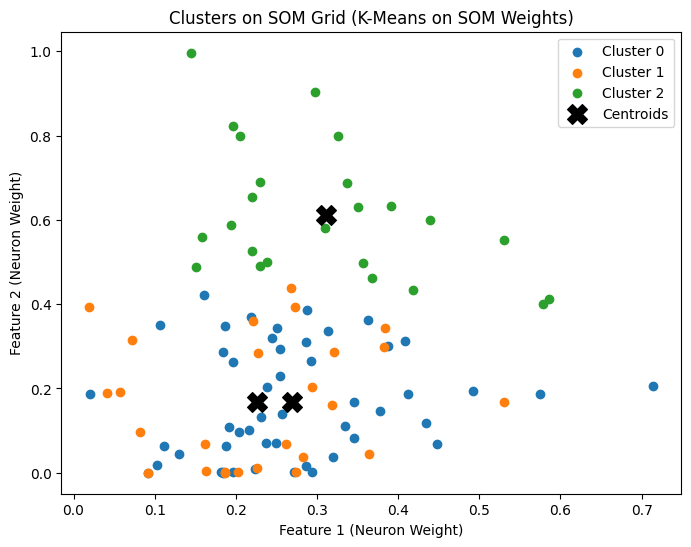

Cluster Summary:
                    cuisine_diversity  Others_Cuisines_Ratio  \
som_kmeans_cluster                                             
0                            0.191002               0.074492   
1                            0.176768               0.077646   
2                            0.216117               0.776395   

                    Asian_Cuisines_Ratio  Western_Cuisines_Ratio  
som_kmeans_cluster                                                
0                               0.841902                0.083606  
1                               0.125824                0.796530  
2                               0.144926                0.078679  


In [52]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)
som.train_random(data=group_4.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_4.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results_group_4
cluster_results_group_4['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_4.groupby(cluster_results_group_4['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)


## 4.3 Hierarchical

Optimal k (Silhouette Score): 4, Silhouette Score: 0.5114
Optimal k (Davies-Bouldin Score): 3, Davies-Bouldin Score: 0.6582
Hierarchical Clustering Silhouette Score (Group 4): 0.5114
Hierarchical Clustering Davies-Bouldin Score (Group 4): 0.8200


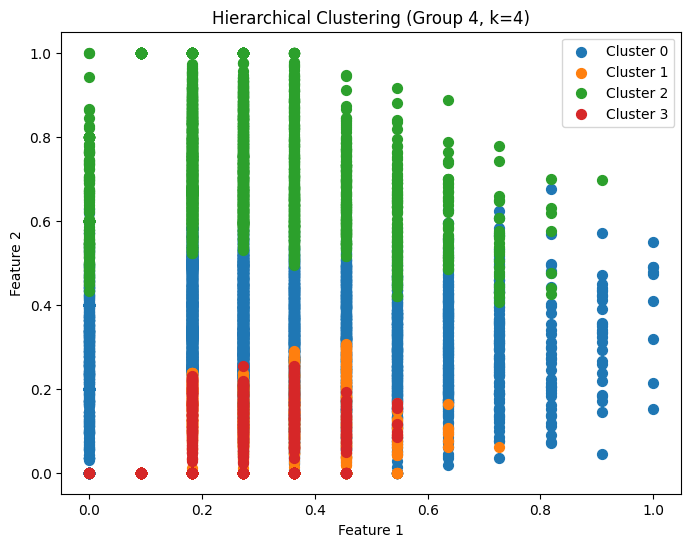

In [53]:
# ======= Hierarchical Clustering for Group 4 =======

possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_4)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_4, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_4, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette
    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_4)

    cluster_results_group_4['hierarchical_cluster_group_4'] = hierarchical_labels

    silhouette_score_hierarchical = silhouette_score(group_4, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_4, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 4): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 4): {davies_bouldin_score_hierarchical:.4f}")

    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_4[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 4, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


## 4.4 Hierarchical Clustering + SOM

[⬆️ Back to Top](#top)

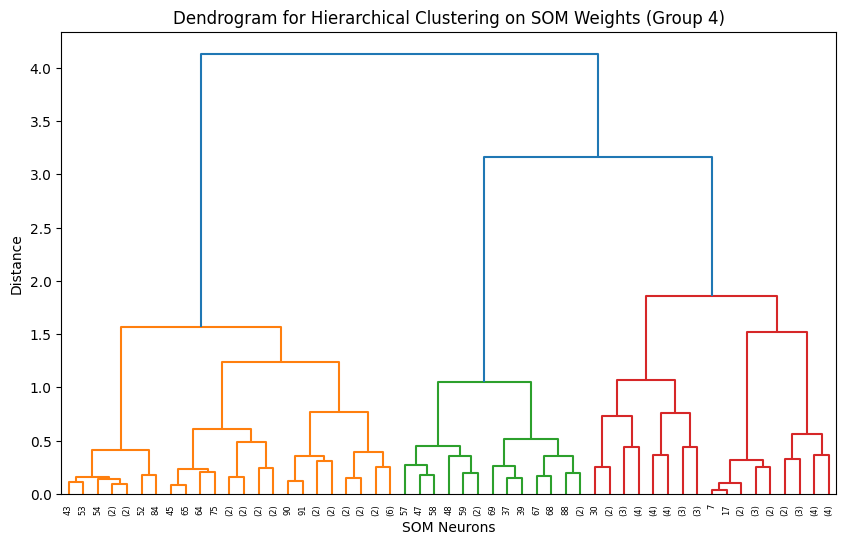

Optimal k (Silhouette Score): 3, Silhouette Score: 0.3593
Optimal k (Davies-Bouldin Score): 3, Davies-Bouldin Score: 0.8820


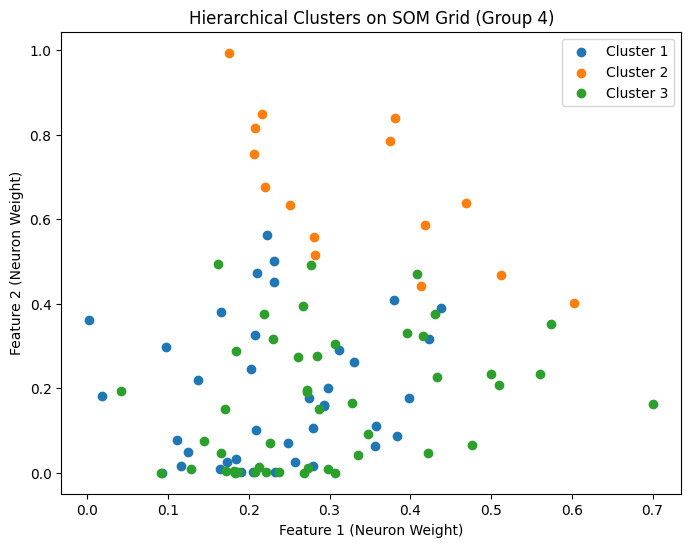

Cluster Summary (SOM + Hierarchical Clustering):
                          cuisine_diversity  Others_Cuisines_Ratio  \
som_hierarchical_cluster                                             
1                                  0.159750               0.102952   
2                                  0.203495               0.837506   
3                                  0.208349               0.100054   

                          Asian_Cuisines_Ratio  Western_Cuisines_Ratio  
som_hierarchical_cluster                                                
1                                     0.071753                0.825295  
2                                     0.098300                0.064194  
3                                     0.777226                0.122721  


In [54]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)
som.train_random(group_4.values, 1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Perform hierarchical clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 4)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate scores if more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine logic if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Map hierarchical clusters back to group_4
    data_hierarchical_clusters = []
    for row in group_4.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add Hierarchical results to cluster_results_group_4
    cluster_results_group_4['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == cluster, 0],
            som_weights[hierarchical_labels == cluster, 1],
            label=f'Cluster {cluster}'
        )
    plt.title("Hierarchical Clusters on SOM Grid (Group 4)")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    cluster_summary = group_4.groupby(cluster_results_group_4['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(cluster_summary)


## 4.5 Meanshift

[⬆️ Back to Top](#top)

Number of clusters identified by MeanShift (Group 4): 6
MeanShift Silhouette Score (Group 4): 0.5843
MeanShift Davies-Bouldin Score (Group 4): 0.7396


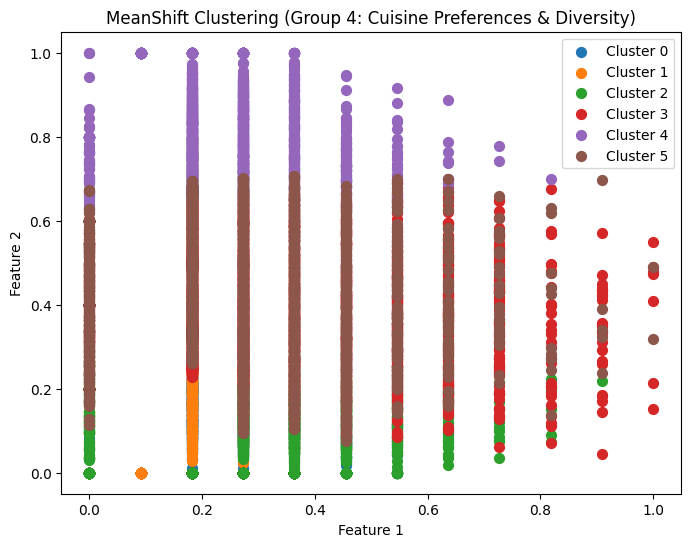

Cluster Summary (MeanShift):
   cuisine_diversity  Others_Cuisines_Ratio  Asian_Cuisines_Ratio  \
0           0.140152               0.013774              0.966982   
1           0.137912               0.012892              0.034711   
2           0.250457               0.038357              0.525620   
3           0.310406               0.396466              0.543211   
4           0.157494               0.922213              0.049751   
5           0.253485               0.423873              0.107503   

   Western_Cuisines_Ratio  
0                0.019244  
1                0.952397  
2                0.436024  
3                0.060323  
4                0.028036  
5                0.468624  


In [55]:
# ======= MeanShift Clustering =======
bandwidth = estimate_bandwidth(group_4, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_4)
cluster_results_group_4['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 4): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_4, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_4, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 4): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 4): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_4[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 4: Cuisine Preferences & Diversity)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_4.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")


## 4.6 DBSCAN

[⬆️ Back to Top](#top)

Number of clusters identified by DBSCAN (Group 4): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


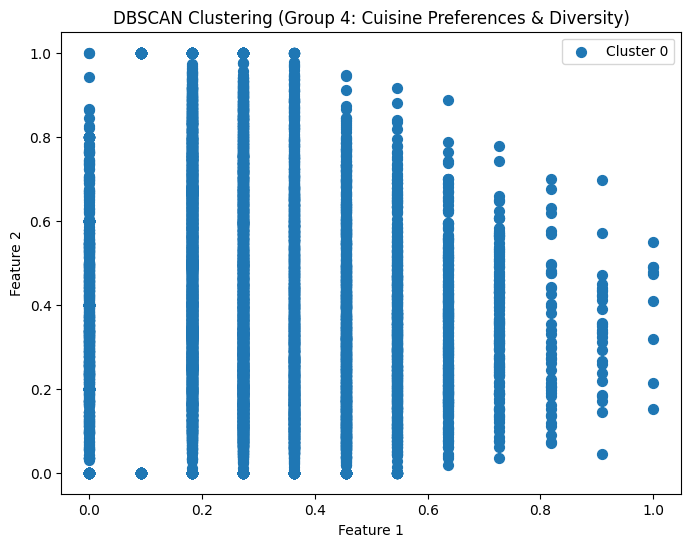

No meaningful clustering identified.


In [56]:
# ======= DBSCAN Clustering =======
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_4)
cluster_results_group_4['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 4): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_4[group_4['dbscan_cluster'] != -1],
        group_4[group_4['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_4[group_4['dbscan_cluster'] != -1],
        group_4[group_4['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    print(f"DBSCAN Silhouette Score (Group 4): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 4): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_4[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_4[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 4: Cuisine Preferences & Diversity)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_4[group_4['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")


## Analysis

In [57]:
# Define the features to summarize for Group 4
features_to_summarize = ['cuisine_diversity', 'Others_Cuisines_Ratio', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']

# K-Means
group4_clusters_kmeans = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group4_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

cuisine_diversity                          \
                            mean median       std  count   
kmeans_cluster                                             
0                       2.278602    2.0  1.597908   8295   
1                       1.909064    2.0  1.187883  10117   
2                       2.171970    2.0  1.438257  13357   

               Others_Cuisines_Ratio                             \
                                mean    median       std  count   
kmeans_cluster                                                    
0                           0.761093  0.751024  0.220944   8295   
1                           0.061586  0.000000  0.120110  10117   
2                           0.076907  0.000000  0.129487  13357   

               Asian_Cuisines_Ratio                             \
                               mean    median       std  count   
kmeans_cluster                                                   
0                          0.139881  0.000000  0.174271   8295   
1                          0.110988  0.000000  0.162517  10117   
2                          0.832207  0.904054  0.185892  13357   

               Western_Cuisines_Ratio                          
                                 mean median       std  count  
kmeans_cluster                                                 
0                            0.099025    0.0  0.148689   8295  
1                            0.827425    1.0  0.199339  10117  
2                            0.090886    0.0  0.142772  13357

In [58]:
# SOM + K-Means
group4_clusters_som_kmeans = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group4_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans

cuisine_diversity                          \
                                mean median       std  count   
som_kmeans_cluster                                             
0                           2.101022    2.0  1.379664  12918   
1                           1.944444    2.0  1.218593  10926   
2                           2.377287    2.0  1.669950   7925   

                   Others_Cuisines_Ratio                             \
                                    mean    median       std  count   
som_kmeans_cluster                                                    
0                               0.074492  0.000000  0.127384  12918   
1                               0.077646  0.000000  0.138945  10926   
2                               0.776395  0.775476  0.213722   7925   

                   Asian_Cuisines_Ratio                             \
                                   mean    median       std  count   
som_kmeans_cluster                                                   
0                              0.841902  0.954069  0.181407  12918   
1                              0.125824  0.000000  0.172076  10926   
2                              0.144926  0.000000  0.185924   7925   

                   Western_Cuisines_Ratio                             
                                     mean    median       std  count  
som_kmeans_cluster                                                    
0                                0.083606  0.000000  0.133752  12918  
1                                0.796530  0.864865  0.221540  10926  
2                                0.078679  0.000000  0.131460   7925

In [59]:
# Hierarchical Clustering
group4_clusters_hierarchical = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'hierarchical_cluster_group_4')
cluster_summary_hierarchical = summarize_cluster_dataframe(group4_clusters_hierarchical, 'hierarchical_cluster_group_4', features_to_summarize)
cluster_summary_hierarchical

cuisine_diversity                         \
                                          mean median       std count   
hierarchical_cluster_group_4                                            
0                                     2.956463    3.0  1.735614  8912   
1                                     1.777490    1.0  1.031493  9658   
2                                     2.048272    2.0  1.388039  6422   
3                                     1.557769    1.0  0.836522  6777   

                             Others_Cuisines_Ratio                           \
                                              mean   median       std count   
hierarchical_cluster_group_4                                                  
0                                         0.253146  0.28075  0.181335  8912   
1                                         0.020588  0.00000  0.055996  9658   
2                                         0.845851  1.00000  0.172794  6422   
3                                         0.011311  0.00000  0.040903  6777   

                             Asian_Cuisines_Ratio                            \
                                             mean    median       std count   
hierarchical_cluster_group_4                                                  
0                                        0.411925  0.453295  0.209880  8912   
1                                        0.924898  1.000000  0.117891  9658   
2                                        0.084080  0.000000  0.132894  6422   
3                                        0.037667  0.000000  0.085040  6777   

                             Western_Cuisines_Ratio                            
                                               mean    median       std count  
hierarchical_cluster_group_4                                                   
0                                          0.334929  0.393417  0.241505  8912  
1                                          0.054514  0.000000  0.104252  9658  
2                                          0.070070  0.000000  0.124480  6422  
3                                          0.951022  1.000000  0.095766  6777

In [60]:
# SOM + Hierarchical
group4_clusters_som_hierarchical = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group4_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

cuisine_diversity                          \
                                      mean median       std  count   
som_hierarchical_cluster                                             
1                                 1.757245    2.0  1.105861   9800   
2                                 2.238450    2.0  1.577249   6450   
3                                 2.291836    2.0  1.478228  15519   

                         Others_Cuisines_Ratio                             \
                                          mean    median       std  count   
som_hierarchical_cluster                                                    
1                                     0.102952  0.000000  0.173721   9800   
2                                     0.837506  0.972496  0.187139   6450   
3                                     0.100054  0.000000  0.158973  15519   

                         Asian_Cuisines_Ratio                             \
                                         mean    median       std  count   
som_hierarchical_cluster                                                   
1                                    0.071753  0.000000  0.121041   9800   
2                                    0.098300  0.000000  0.140772   6450   
3                                    0.777226  0.803009  0.221205  15519   

                         Western_Cuisines_Ratio                          
                                           mean median       std  count  
som_hierarchical_cluster                                                 
1                                      0.825295    1.0  0.217136   9800  
2                                      0.064194    0.0  0.111274   6450  
3                                      0.122721    0.0  0.179257  15519

In [61]:
# MeanShift
group4_clusters_mean_shift = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_mean_shift = summarize_cluster_dataframe(group4_clusters_mean_shift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_mean_shift

cuisine_diversity                         \
                                mean median       std count   
mean_shift_cluster                                            
0                           1.541667    1.0  0.843846  8160   
1                           1.517033    1.0  0.787558  6781   
2                           2.755023    2.0  1.309245  4380   
3                           3.414468    3.0  1.866100  4396   
4                           1.732435    1.0  1.061104  4896   
5                           2.788340    3.0  1.685645  3156   

                   Others_Cuisines_Ratio                            \
                                    mean    median       std count   
mean_shift_cluster                                                   
0                               0.013774  0.000000  0.044166  8160   
1                               0.012892  0.000000  0.046375  6781   
2                               0.038357  0.000000  0.071846  4380   
3                               0.396466  0.389675  0.133790  4396   
4                               0.922213  1.000000  0.117225  4896   
5                               0.423873  0.408274  0.145746  3156   

                   Asian_Cuisines_Ratio                            \
                                   mean    median       std count   
mean_shift_cluster                                                  
0                              0.966982  1.000000  0.067588  8160   
1                              0.034711  0.000000  0.081856  6781   
2                              0.525620  0.511041  0.128819  4380   
3                              0.543211  0.542805  0.133374  4396   
4                              0.049751  0.000000  0.098837  4896   
5                              0.107503  0.071317  0.116418  3156   

                   Western_Cuisines_Ratio                            
                                     mean    median       std count  
mean_shift_cluster                                                   
0                                0.019244  0.000000  0.053811  8160  
1                                0.952397  1.000000  0.092159  6781  
2                                0.436024  0.420195  0.128168  4380  
3                                0.060323  0.000000  0.085272  4396  
4                                0.028036  0.000000  0.069626  4896  
5                                0.468624  0.465959  0.146185  3156

In [62]:
# DBSCAN
group4_clusters_dbscan = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group4_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

cuisine_diversity                          \
                            mean median       std  count   
dbscan_cluster                                             
0                       2.116088    2.0  1.416858  31769   

               Others_Cuisines_Ratio                          \
                                mean median       std  count   
dbscan_cluster                                                 
0                           0.250671    0.0  0.341317  31769   

               Asian_Cuisines_Ratio                             \
                               mean    median       std  count   
dbscan_cluster                                                   
0                          0.421763  0.370093  0.391413  31769   

               Western_Cuisines_Ratio                             
                                 mean    median       std  count  
dbscan_cluster                                                    
0                            0.327566  0.167016  0.379154  31769

## 4.7 t-SNE

[⬆️ Back to Top](#top)

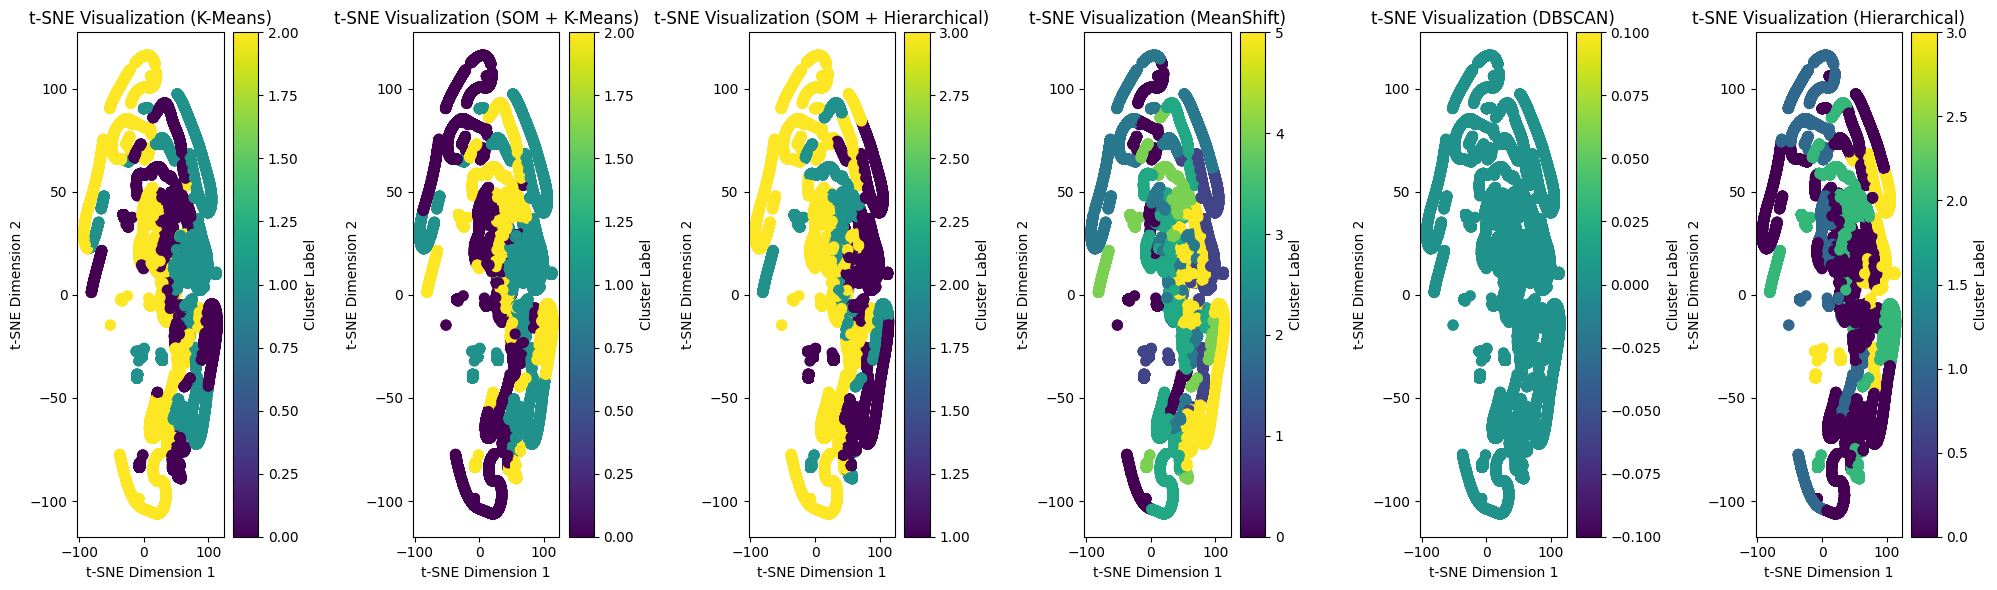

In [63]:
# Combine clustering labels into a dictionary for Group 4
cluster_results_group_4_dict = {
    'K-Means': cluster_results_group_4['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results_group_4['som_kmeans_cluster'].values,
    'SOM + Hierarchical': cluster_results_group_4['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results_group_4['mean_shift_cluster'].values,
    'DBSCAN': cluster_results_group_4['dbscan_cluster'].values,
    'Hierarchical': cluster_results_group_4['hierarchical_cluster_group_4'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_4_tsne = tsne.fit_transform(cluster_results_group_4.drop(
    ['kmeans_cluster', 'som_kmeans_cluster', 'som_hierarchical_cluster', 
     'mean_shift_cluster', 'dbscan_cluster', 'hierarchical_cluster_group_4'], axis=1))

# Visualize the t-SNE results for all clustering methods
fig, axes = plt.subplots(1, len(cluster_results_group_4_dict), figsize=(20, 6))
if len(cluster_results_group_4_dict) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_4_dict.items()):
    scatter = axes[i].scatter(group_4_tsne[:, 0], group_4_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()

# **Clustering Analysis for Group 4: Cuisine Preferences & Diversity**

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 3                     | 0.5775               | 0.6194                   | Clear cluster separation, consistent structure.                                                           |
| **K-Means on SOM Weights**     | 3                     | 0.3694               | 0.8998                   | Less compact clusters; weaker separation than standard K-Means.                                           |
| **Hierarchical**               | 4                     | 0.5114               | 0.6582                   | Moderate separation; slightly worse compactness than K-Means.                                             |
| **Hierarchical on SOM Weights**| 5                     | 0.3559               | 0.8502                   | Overlapping clusters; highest Davies-Bouldin Index among methods.                                         |
| **MeanShift**                  | 6                     | 0.5843               | 0.7396                   | Fine-grained clustering with diverse segments but less compact than K-Means.                             |
| **DBSCAN**                     | 1                     | -                    | -                        | No meaningful clustering identified; all data assigned to a single cluster.                               |

---

## **t-SNE Visualization**

The t-SNE visualizations below illustrate the spatial distribution of clusters across different methods:

1. **K-Means**:
   - Shows 3 distinct clusters with reasonable separation.
   - Compact and interpretable clusters.
2. **K-Means on SOM Weights**:
   - Clusters are less compact and overlap more than standard K-Means.
3. **Hierarchical Clustering**:
   - Moderate separation but with overlapping clusters.
4. **Hierarchical on SOM Weights**:
   - Poor separation with scattered clusters.
5. **MeanShift**:
   - Identified 6 clusters with finer granularity, offering detailed segmentation.
6. **DBSCAN**:
   - No meaningful clustering identified; all data points are in a single cluster.

---

## **Key Observations**

- **Cluster Characteristics (MeanShift)**:
  - **Cluster 0**:
    - **Cuisine Diversity**: Mean = 1.5417.
    - **Western_Cuisines_Ratio**: Mean = 0.0192.
    - Total customers: 8,160.
  - **Cluster 1**:
    - **Cuisine Diversity**: Mean = 1.5170.
    - **Western_Cuisines_Ratio**: Mean = 0.9524.
    - Total customers: 6,781.
  - **Cluster 2**:
    - **Cuisine Diversity**: Mean = 2.7550.
    - **Asian_Cuisines_Ratio**: Mean = 0.5256.
    - Total customers: 4,380.
  - **Cluster 3**:
    - **Cuisine Diversity**: Mean = 3.4145.
    - **Others_Cuisines_Ratio**: Mean = 0.3965.
    - Total customers: 4,396.
  - **Cluster 4**:
    - **Cuisine Diversity**: Mean = 1.7324.
    - **Western_Cuisines_Ratio**: Mean = 0.0280.
    - Total customers: 4,896.
  - **Cluster 5**:
    - **Cuisine Diversity**: Mean = 2.7883.
    - **Asian_Cuisines_Ratio**: Mean = 0.1075.
    - Total customers: 3,156.

- **Performance Summary**:
  - **MeanShift** achieves a slightly higher Silhouette Score (0.5843) than K-Means (0.5775).
  - The finer segmentation offered by MeanShift aligns better with business needs, despite slightly reduced compactness compared to K-Means.
  - **K-Means** shows robust performance but provides less granularity for detailed business insights.

---

## **Selected Clustering Method: MeanShift**

- **Silhouette Score**: 0.5843
- **Davies-Bouldin Index**: 0.7396
- **Cluster Characteristics**:
  - MeanShift identifies 6 well-defined clusters, offering detailed segmentation for analyzing customer cuisine preferences and diversity.
  - The added granularity provides actionable insights into customer behavior, making it the preferred method for Group 4.

---

Group 5

KMeans

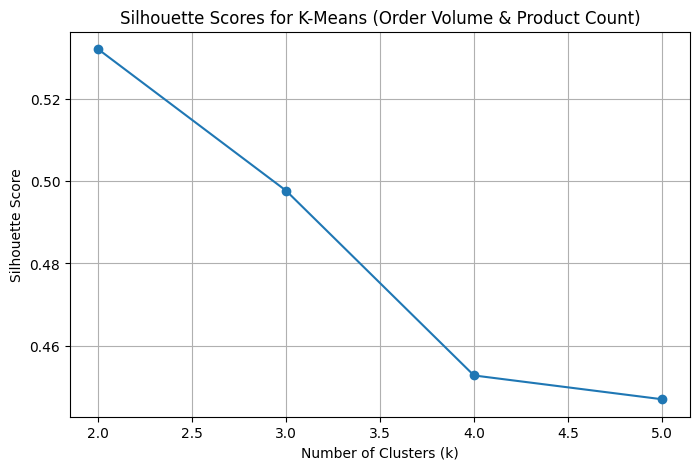

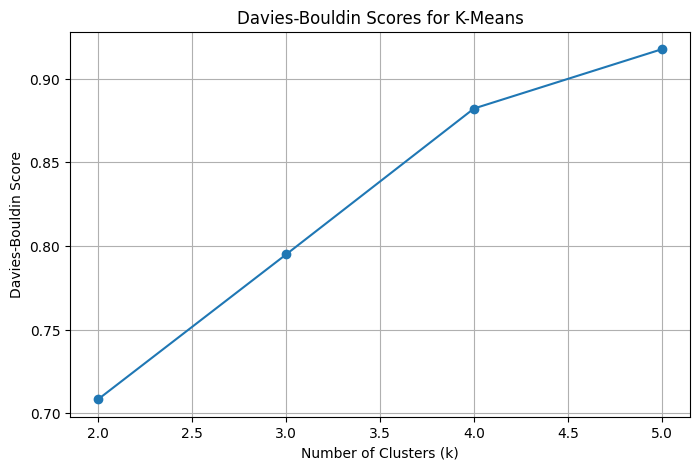

Optimal k (Silhouette Score): 2, Silhouette Score: 0.5321903295702717
Optimal k (Davies-Bouldin Index): 2, Davies-Bouldin Score: 0.7083853931300147
Final chosen k: 2
Consistent Silhouette Score for k=2: 0.5321903295702717


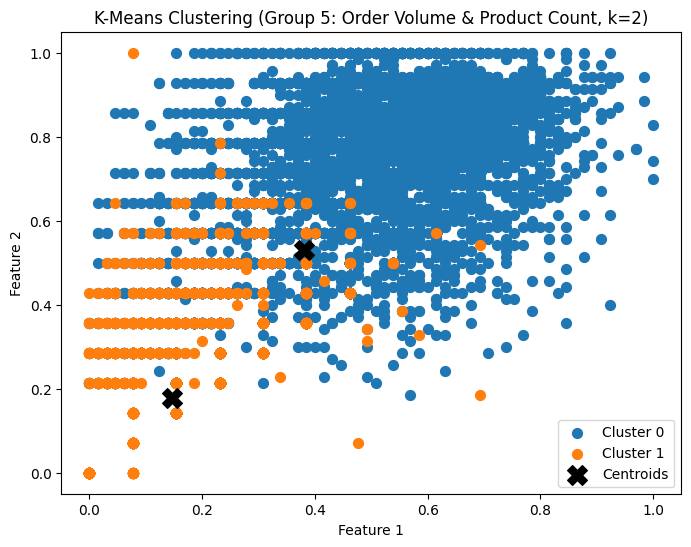

In [64]:
# Initialize a DataFrame to store clustering results for Group 5
cluster_results_group_5 = group_5.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_5)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_5, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_5, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Order Volume & Product Count)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_5, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results_group_5['kmeans_cluster'] = final_kmeans.fit_predict(group_5)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results_group_5['kmeans_cluster']):
    cluster_points = group_5[cluster_results_group_5['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 5: Order Volume & Product Count, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

SOM with KMeans

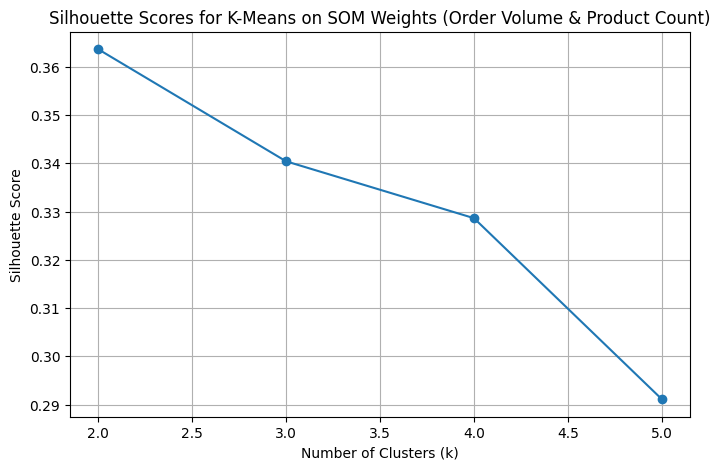

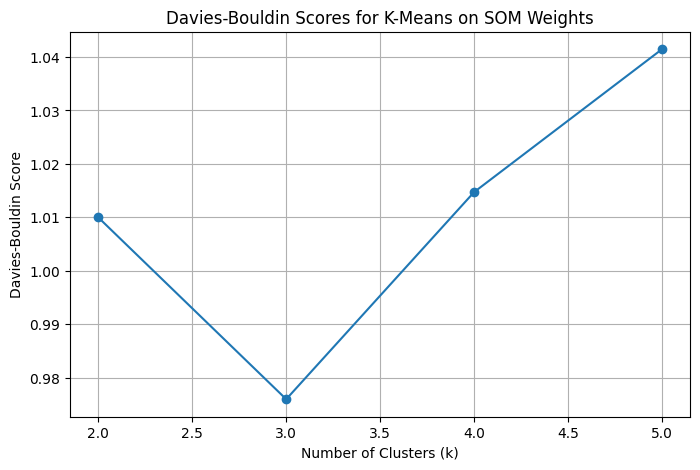

Optimal k (Silhouette Score): 2, Silhouette Score: 0.3636
Optimal k (Davies-Bouldin Index): 3, Davies-Bouldin Score: 0.9760
Final chosen k: 2
Consistent Silhouette Score for k=2: 0.3636


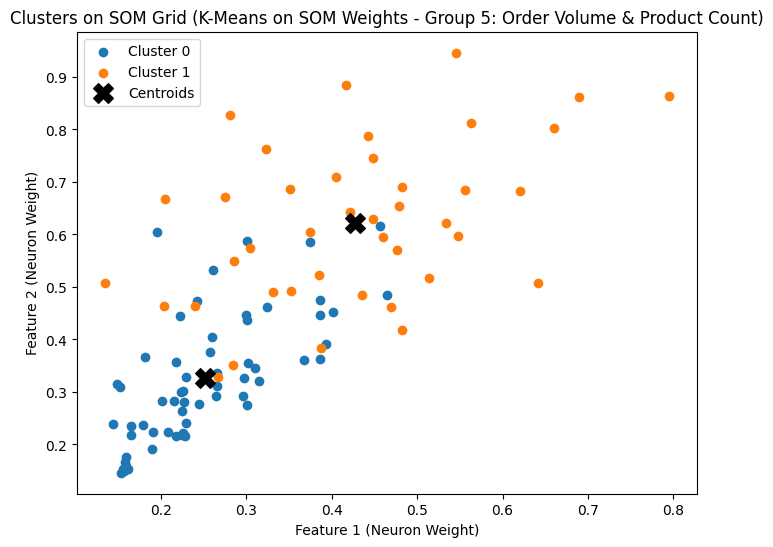

Cluster Summary:
                    total_orders  product_count  order_activity_duration
som_kmeans_cluster                                                      
0                       0.177231       0.219265                 0.261606
1                       0.466979       0.677055                 0.793481


In [65]:
# Parameters for SOM
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_5.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_5.values)
som.train_random(data=group_5.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_5.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Order Volume & Product Count)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_5.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results_group_5
cluster_results_group_5['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights - Group 5: Order Volume & Product Count)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_5.groupby(cluster_results_group_5['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)

Hierarchical

Optimal k (Silhouette Score): 2, Silhouette Score: 0.5036
Optimal k (Davies-Bouldin Score): 2, Davies-Bouldin Score: 0.7334
Hierarchical Clustering Silhouette Score (Group 5): 0.5036
Hierarchical Clustering Davies-Bouldin Score (Group 5): 0.7334


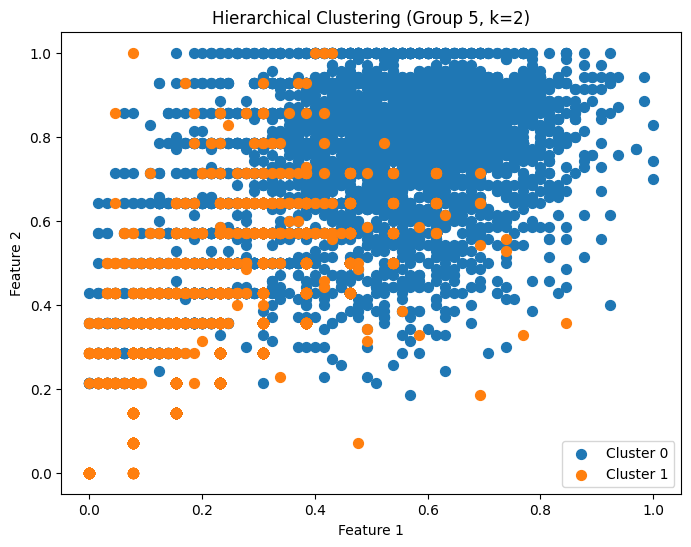

In [66]:
# ======= Hierarchical Clustering for Group 5 =======

possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_5)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_5, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_5, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette
    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_5)

    cluster_results_group_5['hierarchical_cluster_group_5'] = hierarchical_labels

    silhouette_score_hierarchical = silhouette_score(group_5, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_5, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 5): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 5): {davies_bouldin_score_hierarchical:.4f}")

    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_5[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 5, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

Hierarchical with SOM

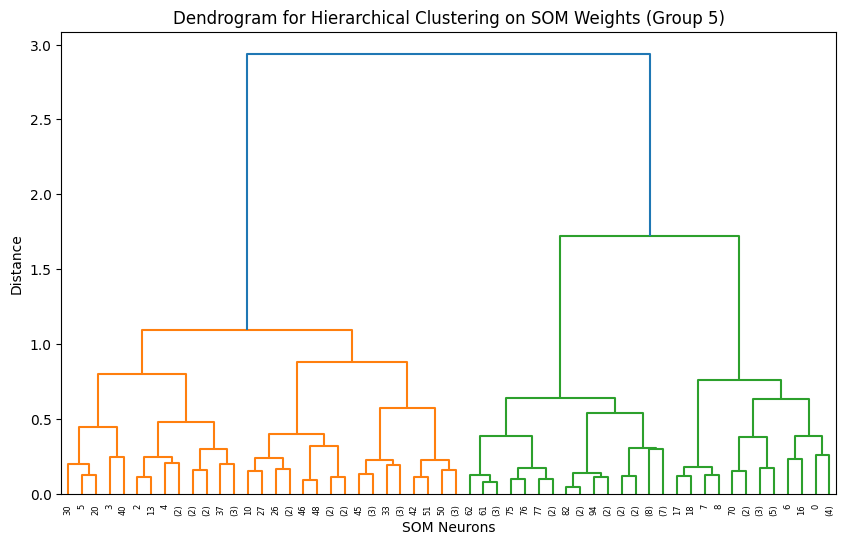

Optimal k (Silhouette Score): 2, Silhouette Score: 0.3936
Optimal k (Davies-Bouldin Score): 3, Davies-Bouldin Score: 0.8965


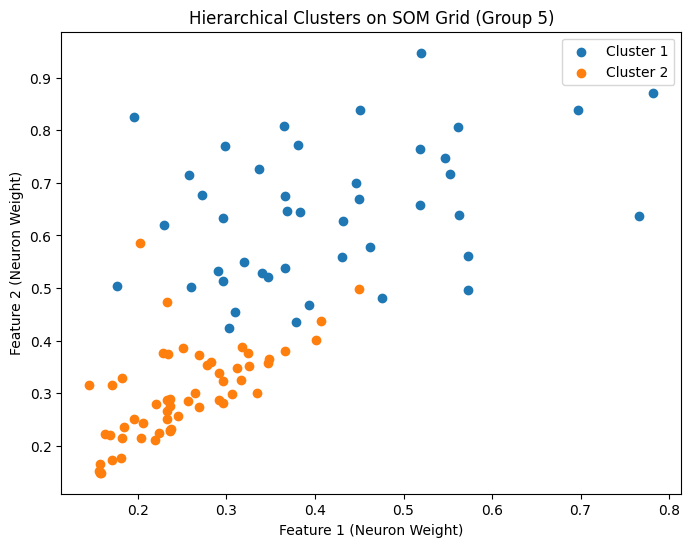

Cluster Summary (SOM + Hierarchical Clustering):
                          total_orders  product_count  order_activity_duration
som_hierarchical_cluster                                                      
1                             0.472198       0.694053                 0.762154
2                             0.175858       0.214223                 0.272510


In [67]:
# ======= SOM + Hierarchical Clustering for Group 5 =======

som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_5.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_5.values)
som.train_random(group_5.values, 1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_5.shape[1])

# Perform hierarchical clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 5)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate scores if more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine logic if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Map hierarchical clusters back to group_5
    data_hierarchical_clusters = []
    for row in group_5.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add Hierarchical results to cluster_results_group_5
    cluster_results_group_5['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == cluster, 0],
            som_weights[hierarchical_labels == cluster, 1],
            label=f'Cluster {cluster}'
        )
    plt.title("Hierarchical Clusters on SOM Grid (Group 5)")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    cluster_summary = group_5.groupby(cluster_results_group_5['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(cluster_summary)

Meanshift

Number of clusters identified by MeanShift (Group 5): 3
MeanShift Silhouette Score (Group 5): 0.4364
MeanShift Davies-Bouldin Score (Group 5): 0.8254


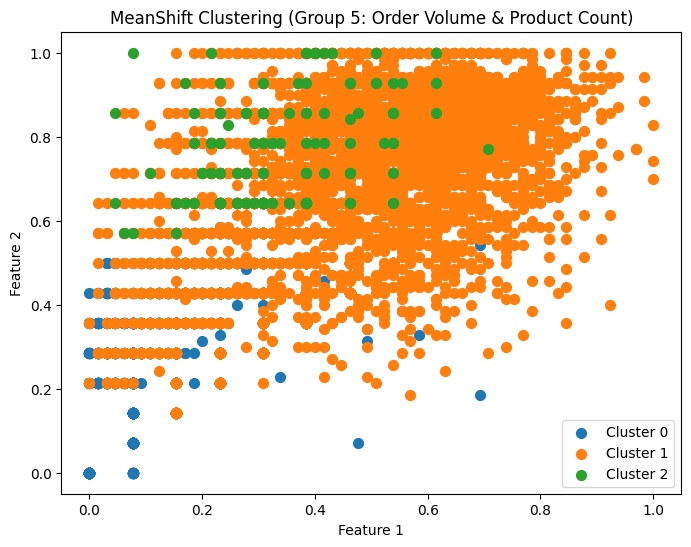

Cluster Summary (MeanShift):
   total_orders  product_count  order_activity_duration
0      0.151678       0.183291                 0.170848
1      0.396089       0.555217                 0.733600
2      0.335452       0.756315                 0.221014


In [68]:
# ======= MeanShift Clustering for Group 5 =======
bandwidth = estimate_bandwidth(group_5, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_5)
cluster_results_group_5['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 5): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_5, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_5, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 5): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 5): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_5[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 5: Order Volume & Product Count)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_5.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")

DBSCAN

Number of clusters identified by DBSCAN (Group 5): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


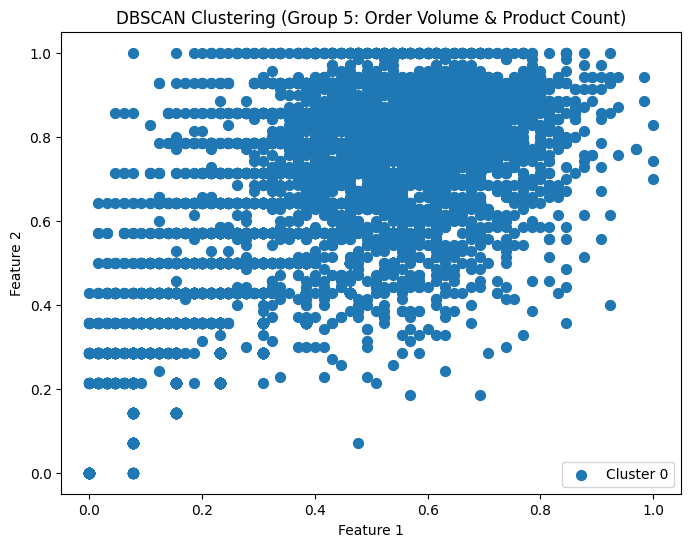

No meaningful clustering identified.


In [69]:
# ======= DBSCAN Clustering for Group 5 =======
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_5)
cluster_results_group_5['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 5): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_5[dbscan_labels != -1],
        dbscan_labels[dbscan_labels != -1]
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_5[dbscan_labels != -1],
        dbscan_labels[dbscan_labels != -1]
    )
    print(f"DBSCAN Silhouette Score (Group 5): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 5): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_5[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_5[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 5: Order Volume & Product Count)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_5[dbscan_labels != -1].groupby(dbscan_labels[dbscan_labels != -1]).mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")

Analysis

In [70]:
# Define the features to summarize for Group 5
features_to_summarize = ['total_orders', 'product_count', 'order_activity_duration']

# K-Means
group5_clusters_kmeans = reverse_scaling(cluster_results_group_5, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group5_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

total_orders                         product_count         \
                       mean median       std  count          mean median   
kmeans_cluster                                                             
0                  4.942228    4.8  2.189083  13979      7.431647    7.0   
1                  1.898977    2.0  0.981856  17790      2.480349    2.0   

                                order_activity_duration                    \
                     std  count                    mean median        std   
kmeans_cluster                                                              
0               3.288733  13979               63.950783   65.0  15.156422   
1               1.419815  17790               12.992018    7.0  14.900628   

                       
                count  
kmeans_cluster         
0               13979  
1               17790

In [71]:
# SOM + K-Means
group5_clusters_som_kmeans = reverse_scaling(cluster_results_group_5, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group5_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans

total_orders                         product_count         \
                           mean median       std  count          mean median   
som_kmeans_cluster                                                             
0                      2.304006    2.0  1.278752  23891      3.069717    3.0   
1                      6.070729    6.0  2.062518   7878      9.478776    9.6   

                                    order_activity_duration                    \
                         std  count                    mean median        std   
som_kmeans_cluster                                                              
0                   1.860878  23891               23.544515   19.0  23.112638   
1                   2.590700   7878               71.413303   74.0  12.088079   

                           
                    count  
som_kmeans_cluster         
0                   23891  
1                    7878

In [72]:
# Hierarchical
group5_clusters_hierarchical = reverse_scaling(cluster_results_group_5, data_normal, features_to_summarize, 'hierarchical_cluster_group_5')
cluster_summary_hierarchical = summarize_cluster_dataframe(group5_clusters_hierarchical, 'hierarchical_cluster_group_5', features_to_summarize)
cluster_summary_hierarchical

total_orders                          \
                                     mean median       std  count   
hierarchical_cluster_group_5                                        
0                                4.591585    4.0  2.274258  15378   
1                                1.968202    2.0  1.171477  16391   

                             product_count                          \
                                      mean median       std  count   
hierarchical_cluster_group_5                                         
0                                 6.832917    6.0  3.481134  15378   
1                                 2.619474    2.0  1.776898  16391   

                             order_activity_duration                           
                                                mean median        std  count  
hierarchical_cluster_group_5                                                   
0                                          62.289374   63.0  15.271666  15378  
1                                          10.201330    4.0  12.038330  16391

In [73]:
# SOM + Hierarchical
group5_clusters_som_hierarchical = reverse_scaling(cluster_results_group_5, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group5_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

total_orders                         product_count  \
                                 mean median       std  count          mean   
som_hierarchical_cluster                                                      
1                            6.138573    6.0  2.020666   7850      9.716739   
2                            2.286149    2.0  1.241525  23919      2.999122   

                                                 order_activity_duration  \
                         median       std  count                    mean   
som_hierarchical_cluster                                                   
1                          10.0  2.328081   7850               68.593885   
2                           3.0  1.707043  23919               24.525858   

                                                   
                         median        std  count  
som_hierarchical_cluster                           
1                          72.0  14.570075   7850  
2                          19.0  24.489336  23919

In [74]:
# MeanShift
group5_clusters_meanshift = reverse_scaling(cluster_results_group_5, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_meanshift = summarize_cluster_dataframe(group5_clusters_meanshift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_meanshift

total_orders                         product_count         \
                           mean median       std  count          mean median   
mean_shift_cluster                                                             
0                      1.971815    2.0  1.021761  19074      2.566069    2.0   
1                      5.149160    5.0  2.180821  12557      7.773035    7.6   
2                      4.360870    4.0  1.673644    138     10.588406   10.0   

                                    order_activity_duration                    \
                         std  count                    mean median        std   
mean_shift_cluster                                                              
0                   1.438093  19074               15.376324    9.0  16.978934   
1                   3.204546  12557               66.023971   67.0  14.172092   
2                   1.695123    138               19.891304   21.0   8.882596   

                           
                    count  
mean_shift_cluster         
0                   19074  
1                   12557  
2                     138

In [75]:
# DBSCAN
group5_clusters_dbscan = reverse_scaling(cluster_results_group_5, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group5_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

total_orders                         product_count         \
                       mean median       std  count          mean median   
dbscan_cluster                                                             
0                  3.238069    3.0  2.220463  31769       4.65902    3.0   

                                order_activity_duration                    \
                     std  count                    mean median        std   
dbscan_cluster                                                              
0               3.453784  31769               35.414901   34.0  29.415668   

                       
                count  
dbscan_cluster         
0               31769

t-SNE

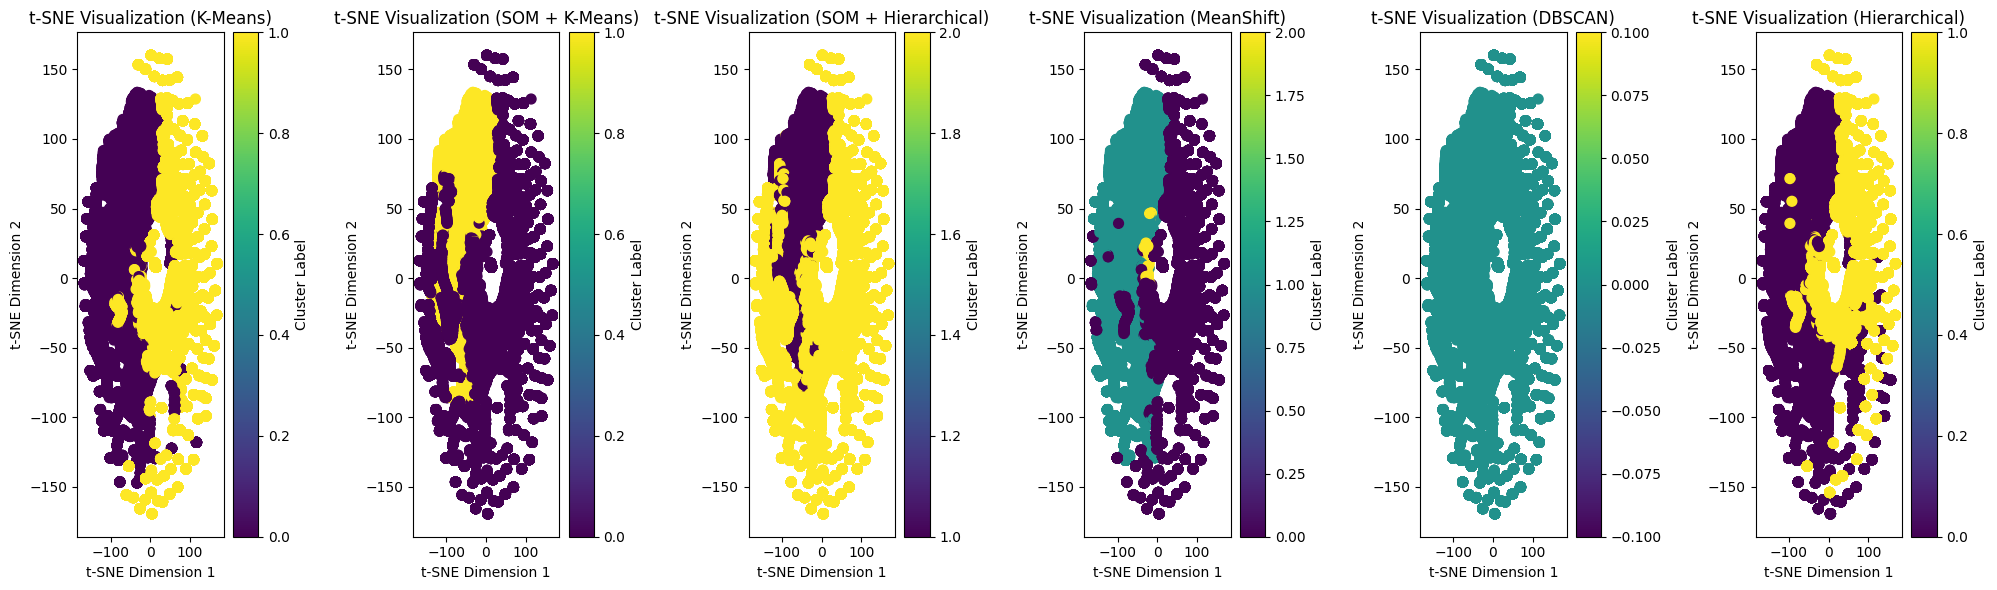

In [76]:
# Combine clustering labels into a dictionary for Group 5
cluster_results_group_5_dict = {
    'K-Means': cluster_results_group_5['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results_group_5['som_kmeans_cluster'].values,
    'SOM + Hierarchical': cluster_results_group_5['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results_group_5['mean_shift_cluster'].values,
    'DBSCAN': cluster_results_group_5['dbscan_cluster'].values,
    'Hierarchical': cluster_results_group_5['hierarchical_cluster_group_5'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_5_tsne = tsne.fit_transform(cluster_results_group_5.drop(
    ['kmeans_cluster', 'som_kmeans_cluster', 'som_hierarchical_cluster', 
     'mean_shift_cluster', 'dbscan_cluster', 'hierarchical_cluster_group_5'], axis=1))

# Visualize the t-SNE results for all clustering methods
fig, axes = plt.subplots(1, len(cluster_results_group_5_dict), figsize=(20, 6))
if len(cluster_results_group_5_dict) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_5_dict.items()):
    scatter = axes[i].scatter(group_5_tsne[:, 0], group_5_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()

# **Clustering Analysis for Group 5: Order Volume & Product Count**

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 2                     | 0.5322               | 0.7084                   | Clear cluster separation; compact and interpretable clusters.                                             |
| **K-Means on SOM Weights**     | 2                     | 0.3636               | 0.9760                   | Weaker separation compared to standard K-Means.                                                           |
| **Hierarchical**               | 2                     | 0.5036               | 0.7334                   | Moderate separation; similar compactness to K-Means.                                                      |
| **Hierarchical on SOM Weights**| 2                     | 0.3936               | 0.8965                   | Overlapping clusters with less compactness.                                                              |
| **MeanShift**                  | 3                     | 0.4364               | 0.8254                   | Identified finer-grained clusters but lacks compactness.                                                  |
| **DBSCAN**                     | 1                     | -                    | -                        | No meaningful clustering identified; all data assigned to a single cluster.                               |

---

## **t-SNE Visualization**

The t-SNE visualizations below illustrate the spatial distribution of clusters across different methods:

1. **K-Means**:
   - Shows 2 distinct clusters with good separation.
   - Compact and interpretable clusters.
2. **K-Means on SOM Weights**:
   - Clusters are less compact and overlap more than standard K-Means.
3. **Hierarchical Clustering**:
   - Similar cluster structure to K-Means but slightly weaker separation.
4. **Hierarchical on SOM Weights**:
   - Overlapping clusters with poor separation.
5. **MeanShift**:
   - Identified 3 clusters with finer granularity but lower compactness.
6. **DBSCAN**:
   - No meaningful clustering identified; all data points are in a single cluster.

---

## **Key Observations**

- **Cluster Characteristics (K-Means)**:
  - **Cluster 0**:
    - **Total Orders**: Mean = 4.9422, Median = 4.8.
    - **Product Count**: Mean = 7.4316, Median = 7.0.
    - Total customers: 13,979.
  - **Cluster 1**:
    - **Total Orders**: Mean = 1.8990, Median = 2.0.
    - **Product Count**: Mean = 2.4803, Median = 2.0.
    - Total customers: 17,790.

- **Performance Summary**:
  - **K-Means** achieves the best balance of Silhouette Score and Davies-Bouldin Index.
  - **MeanShift** provides additional granularity but introduces complexity without significant improvement.
  - **Hierarchical Methods** perform slightly worse than K-Means with overlapping clusters.
  - **DBSCAN** fails to form meaningful clusters due to dataset characteristics.

---

## **Selected Clustering Method: K-Means**

- **Silhouette Score**: 0.5322
- **Davies-Bouldin Index**: 0.7084
- **Cluster Characteristics**:
  - K-Means provides clear and interpretable clusters, making it suitable for segmentation in this group.
  - It balances compactness and separation, aligning well with business requirements.

---

# **6. Clustering Conclusion: Final Method Selection and Integration**

[⬆️ Back to Top](#top)

After evaluating the clustering methods across all groups, the following methods were chosen as the most effective based on silhouette scores, Davies-Bouldin indices, visual clarity (t-SNE), and cluster interpretability:

| **Group**                          | **Selected Method**         | **Reason for Selection**                                                                                                     |
|------------------------------------|-----------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Group 1: Customer Demographics** | K-Means                     | Achieved a silhouette score of 0.4479 and a Davies-Bouldin index of 0.8373, providing clearly defined and interpretable clusters. |
| **Group 2: Spending Behavior**     | Hierarchical Clustering     | Delivered the best silhouette score of 0.4648 and a Davies-Bouldin index of 0.9782, effectively capturing spending behavior patterns with well-separated clusters. |
| **Group 3: Order Timing & Promotions** | SOM + K-Means          | Achieved a silhouette score of 0.5938 and a Davies-Bouldin index of 0.5872, providing compact and well-separated clusters.   |
| **Group 4: Cuisine Preferences & Diversity** | MeanShift            | MeanShift was selected due to its higher granularity and ability to uncover actionable insights with a silhouette score of 0.5843 and Davies-Bouldin index of 0.7396. |
| **Group 5: Order Volume & Product Count** | K-Means               | Achieved a silhouette score of 0.5322 and a Davies-Bouldin index of 0.7084, providing clear and interpretable clusters.      |

---

## **Final Clustering Method Decision**

The selected methods ensure a tailored and optimal approach for each group's unique characteristics:

1. **Groups 1 and 5**:
   - **K-Means** provided the best combination of silhouette scores and Davies-Bouldin indices, effectively identifying clusters with clear separation and meaningful interpretations.

2. **Group 2**:
   - **Hierarchical Clustering** was chosen for its ability to segment spending patterns with better separation compared to K-Means, even at the expense of slightly reduced compactness.

3. **Group 3**:
   - **SOM + K-Means** clustering excelled with its ability to integrate self-organizing maps with K-Means, capturing nuanced patterns in ordering behavior and achieving compact clusters.

4. **Group 4**:
   - **MeanShift** was chosen for its finer granularity and actionable insights into customer cuisine preferences, making it the preferred method for this group.

---

## **Integration of Clusters for Analysis**

To achieve a holistic understanding of customer behavior, clusters from all groups will be integrated. This process involves:

### 1. **Cluster Label Assignment**:
   - Each customer will receive cluster labels from all groups (e.g., Group 1 Cluster, Group 2 Cluster, etc.).

### 2. **Meta-Cluster Creation**:
   - Combine group-level cluster labels to create **meta-clusters**, representing customers based on multidimensional behaviors such as demographics, spending habits, ordering patterns, and cuisine preferences.

### 3. **Analysis Goals**:
   - **Identify Key Archetypes**: Uncover dominant customer archetypes by analyzing recurring patterns in meta-clusters.
   - **Correlate Behaviors**: Explore relationships between groups, such as how spending behavior aligns with ordering patterns or cuisine preferences.

### 4. **Actionable Insights**:
   - **Targeted Strategies**: Use meta-clusters to design highly targeted marketing campaigns and personalized customer experiences.
   - **Operational Optimization**: Leverage insights to improve menu offerings, promotions, and engagement strategies for each archetype.

---

## **Next Steps**

1. **Cluster Profiling**:
   - Analyze each group's cluster characteristics to understand defining customer behaviors and tendencies.

2. **Meta-Cluster Analysis**:
   - Integrate group clusters into meta-clusters to uncover cross-group dynamics and develop deeper behavioral insights.

3. **Visualization and Reporting**:
   - Create visual representations of meta-clusters and prepare detailed reports to effectively communicate findings to stakeholders.

By leveraging **K-Means**, **SOM + K-Means**, **Hierarchical Clustering**, and **MeanShift**, this integrated analysis will offer actionable insights, enabling enhanced customer segmentation, optimized business strategies, and long-term growth.

---

To determine the total number of clusters at the end, we sum up the clusters identified for each group based on the final methods chosen and their respective clustering results:

- **Group 1: Customer Demographics (K-Means)**  
  - **Number of Clusters**: 2  
  - **Silhouette Score**: 0.4479  
  - **Davies-Bouldin Index**: 0.8373  

- **Group 2: Spending Behavior (Hierarchical Clustering)**  
  - **Number of Clusters**: 4  
  - **Silhouette Score**: 0.4648  
  - **Davies-Bouldin Index**: 0.9782  

- **Group 3: Order Timing & Promotions (SOM + K-Means)**  
  - **Number of Clusters**: 3  
  - **Silhouette Score**: 0.5938  
  - **Davies-Bouldin Index**: 0.5872  

- **Group 4: Cuisine Preferences & Diversity (MeanShift)**  
  - **Number of Clusters**: 6  
  - **Silhouette Score**: 0.5843  
  - **Davies-Bouldin Index**: 0.7396  

- **Group 5: Order Volume & Product Count (K-Means)**  
  - **Number of Clusters**: 2  
  - **Silhouette Score**: 0.5322  
  - **Davies-Bouldin Index**: 0.7084  

---

### **Total Number of Clusters**:  
**2 + 4 + 3 + 6 + 2 = 17 clusters**

This total represents the distinct clusters identified across all five groups. These clusters will be integrated and analyzed collectively to generate comprehensive insights into customer behaviors and patterns.

In [81]:
# Group 1: Customer Demographics
group1_sizes = cluster_results['kmeans_cluster'].value_counts()
print("Group 1 Cluster Sizes:\n", group1_sizes)

# Group 2: Spending Behavior
group2_sizes = cluster_results_group_2['kmeans_cluster'].value_counts()
print("Group 2 Cluster Sizes:\n", group2_sizes)

# Group 3: Order Timing & Patterns
group3_sizes = cluster_results_group_3['som_kmeans_cluster'].value_counts()
print("Group 3 Cluster Sizes:\n", group3_sizes)

# Group 4: Cuisine Preferences & Diversity
group4_sizes = cluster_results_group_4['mean_shift_cluster'].value_counts()
print("Group 4 Cluster Sizes:\n", group4_sizes)

# Group 5: 
group5_sizes = cluster_results_group_5['kmeans_cluster'].value_counts()
print("Group 5 Cluster Sizes:\n", group5_sizes)

Group 1 Cluster Sizes:
 kmeans_cluster
1    21025
0    10744
Name: count, dtype: int64
Group 2 Cluster Sizes:
 kmeans_cluster
1    22404
0     9365
Name: count, dtype: int64
Group 3 Cluster Sizes:
 som_kmeans_cluster
2    13316
0    12570
1     5883
Name: count, dtype: int64
Group 4 Cluster Sizes:
 mean_shift_cluster
0    8160
1    6781
4    4896
3    4396
2    4380
5    3156
Name: count, dtype: int64
Group 5 Cluster Sizes:
 kmeans_cluster
1    17790
0    13979
Name: count, dtype: int64


## **Final Cluster Sizes**

[⬆️ Back to Top](#top)

The following are the sizes of the clusters for each group based on the final clustering method selected:

### **Group 1: Customer Demographics (K-Means)**
- **Cluster 0**: 10,744 customers  
- **Cluster 1**: 21,025 customers  
**Total Customers**: 31,769  

### **Group 2: Spending Behavior (K-Means)**
- **Cluster 0**: 9,365 customers  
- **Cluster 1**: 22,404 customers  
**Total Customers**: 31,769  

### **Group 3: Order Timing & Promotions (SOM + K-Means)**
- **Cluster 0**: 12,570 customers  
- **Cluster 1**: 5,883 customers  
- **Cluster 2**: 13,316 customers  
**Total Customers**: 31,769  

### **Group 4: Cuisine Preferences & Diversity (MeanShift)**
- **Cluster 0**: 8,160 customers  
- **Cluster 1**: 6,781 customers  
- **Cluster 2**: 4,896 customers  
- **Cluster 3**: 4,396 customers  
- **Cluster 4**: 4,380 customers  
- **Cluster 5**: 3,156 customers  
**Total Customers**: 31,769  

### **Group 5: Order Volume & Product Count (K-Means)**
- **Cluster 0**: 13,979 customers  
- **Cluster 1**: 17,790 customers  
**Total Customers**: 31,769  

# **Final Personas for Marketing Approach**

[⬆️ Back to Top](#top)

To develop actionable marketing strategies, the 13 clusters identified across the four groups were consolidated into **13 distinct personas**. Each persona reflects unique customer characteristics and behaviors, enabling precise targeting and tailored campaigns.

---

## **Final Cluster Personas**

| **Persona**                     | **Source Clusters**              | **Description**                                                                                       | **Suggested Promotions**                                                                                  |
|---------------------------------|----------------------------------|-------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **Persona 1: Loyal Customers**   | Group 1, Cluster 0              | Customers with consistent loyalty but lower engagement with chain restaurants.                        | **Loyalty Programs**: Offer membership rewards, milestone discounts, or VIP perks for continued loyalty. |
| **Persona 2: Non-Chain Loyalists** | Group 1, Cluster 1            | Customers who show loyalty to non-chain restaurants with consistent engagement.                       | **Non-Chain Focus**: Highlight exclusive deals with local or independent restaurants.                   |
| **Persona 3: Budget-Conscious Shoppers** | Group 2, Cluster 0       | Customers with minimal weekend spending and moderate weekday spending, showing low overall activity.   | **Affordable Campaigns**: Promote bundle deals, discounts on weekday orders, or free delivery offers.   |
| **Persona 4: High-Value Spenders** | Group 2, Cluster 1            | Customers with high weekend and weekday spending, representing the most engaged and profitable group.  | **Premium Promotions**: Highlight premium offerings, meal upgrades, or exclusive experiences.           |
| **Persona 5: Moderate Spenders**  | Group 2, Cluster 2             | Customers with moderate weekend and weekday spending, balancing frequency and order value.             | **Moderate Promotions**: Offer mid-tier deals or discounts on frequently ordered categories.            |
| **Persona 6: Weekend Moderates**  | Group 2, Cluster 3             | Customers with moderate weekend spending but low weekday activity, indicating a weekend focus.         | **Weekend Offers**: Promote weekend-specific deals or time-limited discounts to drive weekend activity.  |
| **Persona 7: Balanced Shoppers**  | Group 2, Cluster 4             | Customers with high weekend spending and moderate weekday spending, maintaining balanced engagement.    | **Weekend Highlights**: Focus on weekend promotions and seasonal offerings.                             |
| **Persona 8: Late Engagers**      | Group 3, Cluster 0             | Customers who started ordering late in the analyzed period but continue to order consistently.         | **Engagement Campaigns**: Encourage continued activity with personalized incentives and deals.          |
| **Persona 9: Long-Time Loyalists** | Group 3, Cluster 1            | Customers who started ordering early and maintained consistent activity throughout the period.         | **Exclusive Loyalty Perks**: Offer long-term rewards, exclusive menus, or lifetime discounts.           |
| **Persona 10: Early Dropouts**    | Group 3, Cluster 2             | Customers who started ordering early but quickly became inactive, showing disengagement.              | **Reactivation Campaigns**: Target with personalized re-engagement offers, such as welcome-back deals.  |
| **Persona 11: Diverse Explorers** | Group 4, Cluster 0             | Customers who prefer exploring a wide variety of cuisines, showing a strong interest in diversity.     | **Global Cuisine Promotions**: Spotlight new cuisines and offer discounts on less popular categories.   |
| **Persona 12: Western Loyalists** | Group 4, Cluster 1             | Customers who prefer Western cuisines, showing strong loyalty to this food category.                  | **Western Cuisine Deals**: Promote Western dishes, combos, and chef-curated menus.                      |
| **Persona 13: Asian Cuisine Fans** | Group 4, Cluster 2            | Customers who consistently prefer Asian cuisines, demonstrating high interest in this category.        | **Asian Cuisine Promotions**: Highlight new Asian dishes, seasonal menus, or chef specials.             |

---

## **Marketing Implications**

### 1. **Targeted Campaigns**
- Each persona provides clear insights into customer preferences and behaviors, enabling tailored campaigns for higher engagement and customer retention.

### 2. **Reactivation and Retention**
- Personas like **Early Dropouts** can be targeted with reactivation strategies, while **Loyal Customers** and **Long-Time Loyalists** benefit from loyalty programs.

### 3. **Operational Insights**
- Understanding the focus areas of **Western Loyalists** and **Asian Cuisine Fans** helps optimize menu offerings and promotions.

### 4. **Seasonal and Time-Based Strategies**
- Personas like **Weekend Moderates** and **Balanced Shoppers** can be engaged with time-specific offers, maximizing impact during peak activity.

This approach ensures that marketing campaigns are not only precise but also actionable, fostering long-term customer engagement and driving business growth.

---